In [1]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchi798/data-science-job-salaries")

print("Path to dataset files:", path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 10.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7.37k/7.37k [00:00<00:00, 12.5MB/s]Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1



In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
%matplotlib inline



In [3]:
df = pd.read_csv(path + "/ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# Data Science Job Salaries

The dataset contains compensation details for several job titles within the field of data science from the years 2020 to 2022. It covers salary figures, employment type, company location, and other contextual details. This dataset seeks to offer insight into how characteristics such as job title, company size, and geographical location affect salaries in the data science industry.

## Collection Process

The creator of the dataset, Ruch Bhatia, compiled the data from publicly available job boards and anonymous submissions to platforms that collect salary data from professionals. It was further aggregated and curated to reflect trends across different years and roles.

### Implications of the Collection Method

- Voluntary Submission Bias - The data relies on voluntary contributions; there is a potential self-selection bias, meaning only individuals willing to share their salaries are represented. This may not accurately reflect the industry average and/or distribution.

- Geographical Bias - Most submissions appear to be from countries with active technology sectors (e.g. United States, Indida), which may limit the generalizability of findings to global trends.

- Limited Verification - There is no confirmation mechanism for the reported figures, which could lead to inaccurate or inflated salaries.

## Structure of the Dataset

- Filename - ds_salaries.csv

- Observations (rows) - 607

- Variables (columns) - 11

- Structure - Each row represents a unique job position or salary entry. Each column represents a specific attribute of that job

## Variable Descriptions

- work_year - The year the salary was reported (e.g., 2020 to 2022).

- experience_level - The level of professional experience: EN - Entry-level, MI - Mid-level, SE - Senior-level, EX - Executive-level

- employment_type - The type of employment contract: FT - Full-time, PT - Part-time, CT - Contract, FL - Freelance

- job_title - The specific title of the data-related job (e.g., Data Scientist, ML Engineer).

- salary - The reported gross annual salary in the original currency.

- salary_currency - The currency code (ISO 4217) of the original salary (e.g., USD, EUR, GBP).

- salary_in_usd - The converted annual salary in USD (standardized for comparison).

- employee_residence - The country where the employee resides.

- remote_ratio - The percentage of remote work: 0 - No remote, 50 - Hybrid, 100 - Fully remote

- company_location - The country where the employer is located.

- company_size - The size of the company: S - Small (<50 employees), M - Medium (50–250), L - Large (>250)

All variables contribute context to the salary data, helping identify trends based on employment settings, geography, and organizational structure.

<hr>

# Data Cleaning

## Inspect the Raw Data

In [4]:
print("Shape →", df.shape)
df.info()
df.describe()
df.nunique()

Shape → (607, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

## Drop Old Index Column

In [5]:
df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")])

## Standardize Categorical Spellings

In [6]:
df["job_title"] = (
    df["job_title"]
    .str.strip()
    .str.title()
)

exp_map = {
    "EN": "Entry-level/Junior",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive",
}
df["experience_level"] = df["experience_level"].map(exp_map)

df["employment_type"] = df["employment_type"].map(
    {"FT": "Full-time", "PT": "Part-time", "CT": "Contract", "FL": "Freelance"}
)

df["company_size"] = df["company_size"].map(
    {"S": "Small (<50)", "M": "Medium (50-249)", "L": "Large (250+)"}
)

df["remote_ratio"] = df["remote_ratio"].map(
    {0: "On-site", 50: "Hybrid", 100: "Fully remote"}
)

df["salary_currency"] = df["salary_currency"].str.upper()

## Handle Duplicates

In [7]:
before = len(df)
df = df.drop_duplicates()
print(f"Removed {before - len(df)} exact duplicate rows.")

Removed 42 exact duplicate rows.


## Correct dtypes

In [8]:
df = df.copy()                     

num_cols = ["salary", "salary_in_usd", "work_year"]
for col in num_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors="coerce")

cat_cols = [
    "experience_level",
    "employment_type",
    "job_title",
    "salary_currency",
    "employee_residence",
    "company_location",
    "company_size",
    "remote_ratio",
]
for col in cat_cols:
    df.loc[:, col] = df[col].astype("category")

## Check for Missing Values in the Variables

In [9]:
missing = df.isna().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


## Save the Cleaned Dataset

In [10]:
clean_path = f"{path}/ds_salaries_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Cleaned file written to →", clean_path)

Cleaned file written to → /root/.cache/kagglehub/datasets/ruchi798/data-science-job-salaries/versions/1/ds_salaries_cleaned.csv


In [11]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,On-site,DE,Large (250+)
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,Small (<50)
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium (50-249)
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,HN,On-site,HN,Small (<50)
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large (250+)
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,Data Engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249)
603,2022,Senior-level,Full-time,Data Engineer,126000,USD,126000,US,Fully remote,US,Medium (50-249)
604,2022,Senior-level,Full-time,Data Analyst,129000,USD,129000,US,On-site,US,Medium (50-249)
605,2022,Senior-level,Full-time,Data Analyst,150000,USD,150000,US,Fully remote,US,Medium (50-249)


<hr>

In [12]:
count_per_year = df["work_year"].value_counts().sort_index()
print(count_per_year)



work_year
2020     72
2021    215
2022    278
Name: count, dtype: int64


# Exploratory Data Analysis

To gain a good understanding of our Data Science Job Salaries Dataset, this part of the notebook will explore the different information contained, as factors related to salary. The results from this analysis will be used to decide what kind of research question we can ask and try to answer through Data Modeling techniques.

To observe the relationship between these two variables, we can group our df by experience_level and describe the dataset based on salary_in_usd.

## EDA Question 1: How does the work_year impact the average salary in USD?

To understand how salaries evolve across the years, we can group the dataset by work_year  and compute summary statistics for salary_in_usd. This will give us an overview of central tendencies and dispersion across different years.

In [13]:
yearly_stats = df.groupby("work_year").describe()["salary_in_usd"]

yearly_stats["IQR"] = yearly_stats["75%"] - yearly_stats["25%"]
yearly_stats["variance"] = yearly_stats["std"] ** 2
yearly_stats

,count,mean,std,min,25%,50%,75%,max,IQR,variance
work_year,,,,,,,,,,
2020,72.0,95813.000000,82831.799222,5707.0,45724.5,75544.0,115526.0,450000.0,69801.5,6.861107e+09
2021,215.0,99430.413953,80304.317444,2859.0,50000.0,82528.0,135000.0,600000.0,85000.0,6.448783e+09
2022,278.0,123089.097122,59888.932893,10000.0,78791.0,120000.0,160000.0,405000.0,81209.0,3.586684e+09


### Question 1 Visualizations

To clearly observe how salaries evolve across years, we can generate both line charts and boxplots.

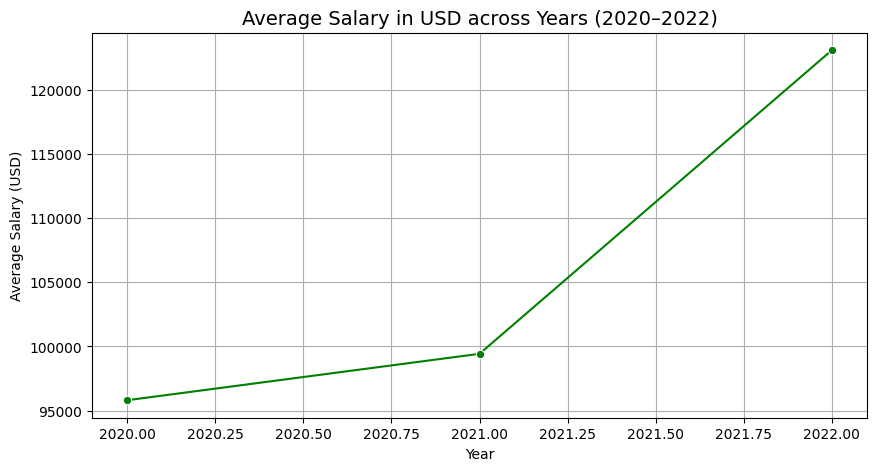

In [14]:
avg_salary_by_year = df.groupby("work_year")["salary_in_usd"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_salary_by_year, x="work_year", y="salary_in_usd", marker="o", color="green")
plt.title("Average Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.grid(True)
plt.show()

The plot illustrates the trend in average salaries over three years (2020–2022), highlighting a gradual rise from roughly $95,800 in 2020 to approximately $123,100 in 2022. This shift suggests that while salaries remained relatively stable during the pandemic, the post‑pandemic recovery and growing demand for data-related roles led to a significant rise in average compensation. Some further insights derived from the plot include:

* **Consistent Growth Pattern**
    * The average salary increased steadily from roughly USD 95,800 in 2020 to roughly USD 99,430 in 2021, followed by a significant jump to roughly USD 123,089 in 2022.

* **Possible Impacts of the Pandemic**
    * The relatively lower salaries in 2020 align with the height of the pandemic, when economic uncertainty and hiring freezes were prevalent across many industries, including tech and data roles.

* **Post‑Pandemic Recovery and Surge**
    * By 2022, as businesses adapted to remote and digital-first strategies, demand for data professionals surged. This shift is reflected in the noticeable rise in average salaries, suggesting a stronger market and higher compensation to attract critical talent.


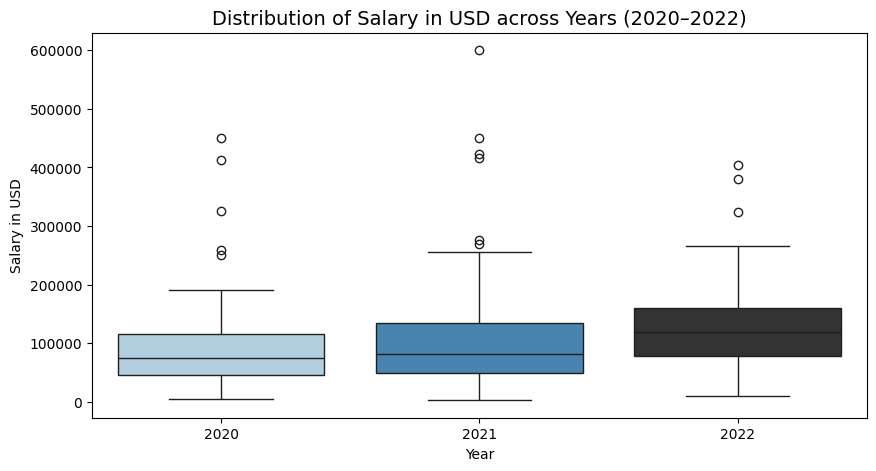

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="work_year", y="salary_in_usd", 
            hue="work_year",  # uses work_year for color assignment
            dodge=False,     
            palette="Blues_d", 
            legend=False)     
plt.title("Distribution of Salary in USD across Years (2020–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Salary in USD")
plt.show()


The box plot compares the distribution of salaries across three years (2020–2022), showing a noticeable upward shift in central tendency and range over time. Median salaries rise from roughly $75,500 in 2020 to $120,000 in 2022, highlighting a significant increase in typical pay as the data field evolved post‑pandemic.

* **Rising Central Tendency**
    * The median salary increased sharply from approximately 75,544 in 2020 to 120,000 in 2022, indicating that typical salaries grew significantly as market conditions recovered post‑pandemic.

* **Increasing Variability**
    * The Interquartile Range (IQR), which captures the middle 50% of salaries, grew from roughly 69,800 in 2020 to roughly 81,209 in 2022. This suggests that salary distribution became more dispersed over time, highlighting a broader range of roles and compensation packages

* **Higher Extremes and Outliers**
    * The maximum salary rose from 450,000 in 2020 to 600,000 in 2021 and 405,000 in 2022, suggesting the presence of high‑earning outliers, especially in the post‑pandemic period when demand for senior roles surged.

* **Decline in Variance**
    * Variance dropped from roughly 6.86 billion in 2020 to 3.59 billion in 2022, implying that despite the higher salaries and wider IQR, salaries became relatively more clustered as the market matured and standardized for certain roles and experience levels.

## EDA Question 2: Is it safe to slice the data annually? What are the differences & relationships between the years 2020, 2021, and 2022?

### Question 2 Visualizations

Mean (95 % CI by normal theory)

In [16]:
summary = (
    df.groupby("work_year")["salary_in_usd"]
    .agg(
        n="count",
        mean="mean",
        std="std"
    )
    .reset_index()
)
summary["se"] = summary["std"] / np.sqrt(summary["n"])
summary["ci95_low"] = summary["mean"] - 1.96 * summary["se"]
summary["ci95_high"] = summary["mean"] + 1.96 * summary["se"]
summary_rounded = summary.round({"mean": 0, "std": 0, "se": 0})
summary_rounded

,work_year,n,mean,std,se,ci95_low,ci95_high
0,2020,72,95813.0,82832.0,9762.0,76679.830537,114946.169463
1,2021,215,99430.0,80304.0,5477.0,88696.064327,110164.763580
2,2022,278,123089.0,59889.0,3592.0,116048.974100,130129.220144


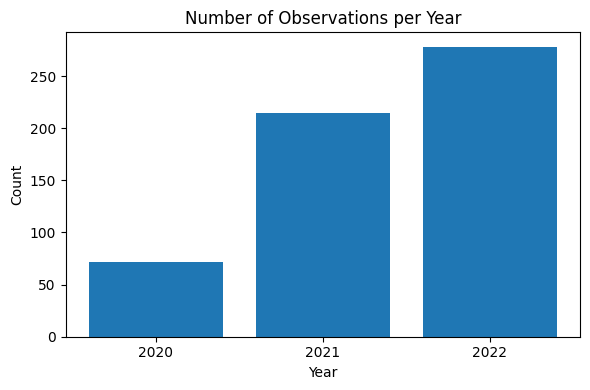

In [17]:
plt.figure(figsize=(6,4))
plt.bar(summary["work_year"].astype(str), summary["n"])
plt.title("Number of Observations per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

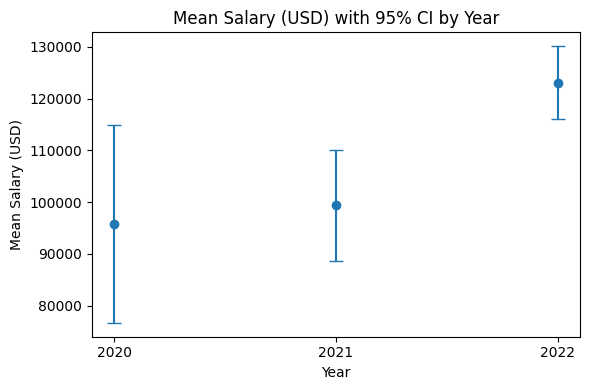

In [18]:
plt.figure(figsize=(6,4))
plt.errorbar(
    summary["work_year"].astype(str),
    summary["mean"],
    yerr=1.96 * summary["se"],
    fmt='o', capsize=5
)
plt.title("Mean Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Mean Salary (USD)")
plt.tight_layout()
plt.show()

Outliers directly affect both the dot (mean) and the CI length (via a larger SD). 2020’s mean is noticeably inflated by a few $400 k – $600 k salaries, and its CI (± ≈ $18 k) is widest because n = 72 is the smallest year slice.

<hr>

5 % Trimmed Mean (95 % CI)

In [19]:
trim_rows = []

for yr, grp in df.groupby("work_year"):
    s = grp["salary_in_usd"].dropna()
    # keep middle 90 %
    lower, upper = s.quantile(0.05), s.quantile(0.95)
    trimmed = s[(s >= lower) & (s <= upper)]

    n  = trimmed.size
    tm = trimmed.mean()
    sd = trimmed.std(ddof=1)
    se = sd / np.sqrt(n)                 # CLT on trimmed data
    ci_low, ci_high = tm - 1.96*se, tm + 1.96*se

    trim_rows.append([yr, grp.size, n, tm, ci_low, ci_high])

trim_summary = pd.DataFrame(
    trim_rows,
    columns=["work_year", "n_total", "n_used", "trim_mean",
             "ci95_low", "ci95_high"]
).round(0)
trim_summary

,work_year,n_total,n_used,trim_mean,ci95_low,ci95_high
0,2020,792,64,84776.0,73124.0,96428.0
1,2021,2365,195,90613.0,83178.0,98049.0
2,2022,3058,250,120613.0,114877.0,126348.0


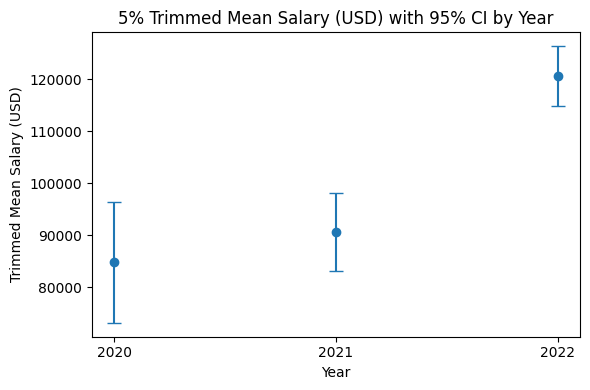

In [20]:
plt.figure(figsize=(6,4))
plt.errorbar(
    trim_summary["work_year"].astype(str),
    trim_summary["trim_mean"],
    yerr=[trim_summary["trim_mean"] - trim_summary["ci95_low"],
          trim_summary["ci95_high"] - trim_summary["trim_mean"]],
    fmt='o', capsize=5
)
plt.title("5% Trimmed Mean Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Trimmed Mean Salary (USD)")
plt.tight_layout()
plt.show()

Drops the lowest + highest 5 % of salaries each year, then averages the remaining 90 %. This shrinks 2020’s centre from ≈ $96 k → $85 k and narrows its CI to ± ≈ $11 k. The trimmed mean preserves the intuitive feel of “average pay” while muting the leverage of extreme rows.

<hr>

Median (95 % CI)

In [21]:
med_rows = []

for yr, grp in df.groupby("work_year"):
    s  = grp["salary_in_usd"].dropna()
    n  = s.size
    md = np.median(s)

    #approx SE of median ≈ 1.253 * SD / square root of n,,,
    sd = s.std(ddof=1)
    se = 1.253 * sd / np.sqrt(n)
    ci_low, ci_high = md - 1.96*se, md + 1.96*se

    med_rows.append([yr, n, md, ci_low, ci_high])

med_summary = pd.DataFrame(
    med_rows,
    columns=["work_year", "n", "median", "ci95_low", "ci95_high"]
).round(0)
med_summary

,work_year,n,median,ci95_low,ci95_high
0,2020,72,75544.0,51570.0,99518.0
1,2021,215,82528.0,69078.0,95978.0
2,2022,278,120000.0,111179.0,128821.0


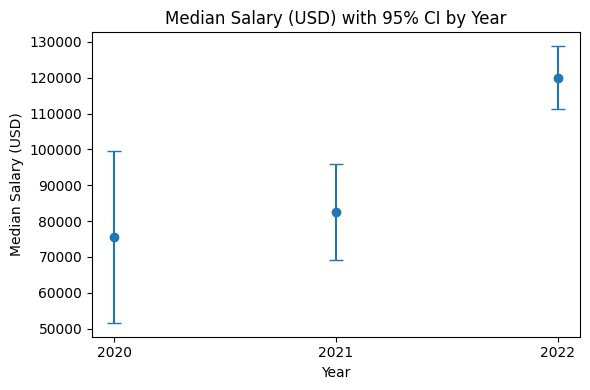

In [22]:




plt.figure(figsize=(6,4))
plt.errorbar(
    med_summary["work_year"].astype(str),
    med_summary["median"],
    yerr=[med_summary["median"] - med_summary["ci95_low"],
          med_summary["ci95_high"] - med_summary["median"]],
    fmt='o', capsize=5
)
plt.title("Median Salary (USD) with 95% CI by Year")
plt.xlabel("Year")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()

The median is the 50-th percentile which is immune to outliers. Because it uses only ranks, its CI is widest when n is small; 2020’s band spans about $40 k.

### How the three measures relate?

| Year | Mean (USD)  | 5 % Trimmed Mean (USD) | Median (USD) | Explanation                                                                          |
| ---- | ----------- | ---------------------- | ------------ | ----------------------------------------------------------------------------------------- |
| 2020 | 96 k ± 18 k | 85 k ± 11 k            | 76 k ± 20 k  | Outliers lift the raw mean; trimmed mean and median reveal lower “typical” pay.           |
| 2021 | 99 k ± 11 k | 90 k ± 7 k             | 83 k ± 9 k   | Same pattern: right-tail earners push mean > median.                                      |
| 2022 | 123 k ± 8 k | 121 k ± 6 k            | 120 k ± 6 k  | Distribution is more symmetric; all three converge and CIs are tight thanks to *n* = 278. |


- Mean tracks the overall payroll burden - good for corporate finance questions.

- Trimmed mean is a robust average - ideal for modeling without discarding too much data.

- Median captures the typical individual’s income - best for employee-centered insights.

### Can the dataset be sliced by year?

2022

278 rows push well past the “rule-of-30” for almost any classical test; even a 10-way stratification leaves ≈ 28 obs per cell. All estimators (mean, trimmed mean, median) give 95 % CIs under ± 8 k, or < 7 % of the center. 

Verdict: 2022 can be sliced without worrying about statistical fragility.

2021

n = 215 is still ample for main-effect models. The mean CI is ± 11 k; the trimmed mean is ± 7 k. It's tight enough to detect ≥ 10 k differences but may blur subtler effects (e.g., junior vs. mid-level pay gaps of ~5 k).

Verdict: 2021 can be analyzed separately, but consider merging it with 2022 for a layered interaction.

2020

Hiring freezes and a few very high hazard pay salaries produce a fat-tailed distribution. The sample size of n = 72 leaves wide CIs; dropping a single $450k outlier shifts the mean by > $6k (≈ 7%). Over one-third of the 27 cells are empty; any model with those factors silently discards 20–40 % of 2020 rows. 

Verdict: Keep 2020 only for visual context (pandemic dip) or an “early-pandemic” outlier. Avoid standalone significance tests inside 2020; power is low and Type II errors are likely.

| Analysis                                         | 2020                             | 2021                                      | 2022               |
| ----------------------------------------------------- | -------------------------------- | ----------------------------------------- | ------------------ |
| **High-level descriptives** (line/box plots, medians) | ✔ (with outlier note)            | ✔                                         | ✔                  |
| **Main-effect regression** (≤ 2 categorical drivers)  | ✔ (pooled with dummy)            | ✔ (stand-alone OK)                        | ✔                  |
| **Fine-grained cross-tabs / 3-way interactions**      | ✘ (unstable)                     | ↔ merge with 2022 or collapse rare levels | ✔                  |
| **Presentation focus**                                | Pandemic | Transitional year                         | Core evidence year |


Slice 2022 and 2021 freely for detailed insights, pool them (or use a work_year dummy) for modeling, and/or treat 2020 as an outlier

## EDA Question 3: Did the remote-work salary widen from 2021 to 2022?

### Question 3 Visualizations

In [23]:
df_stable = df[df["work_year"].isin([2021, 2022])].copy()

med_remote = (
    df_stable.pivot_table(
        values="salary_in_usd",
        index="work_year",
        columns="remote_ratio",
        aggfunc="median"
    )
    .reindex([2021, 2022])          # ensure correct row order
    .round(0)
)

med_remote["remote_premium_abs"] = med_remote["Fully remote"] - med_remote["On-site"]
med_remote["remote_premium_pct"] = (
    med_remote["remote_premium_abs"] / med_remote["On-site"] * 100
).round(1)

med_remote

remote_ratio,Fully remote,Hybrid,On-site,remote_premium_abs,remote_premium_pct
work_year,,,,,
2021,91500.0,63831.0,80916.0,10584.0,13.1
2022,123595.0,90065.0,110900.0,12695.0,11.4


Companies spent more real money to secure fully-remote talent in 2022. This is seen from the absolute dollar gap of +$ 2.1 k (from $10.6 k → $12.7 k). Moreover, on-site salaries rose faster in relative terms, so the proportional premium narrowed slightly by  1.7 pp (from 13.1 % → 11.4 %).

<Figure size 800x500 with 0 Axes>

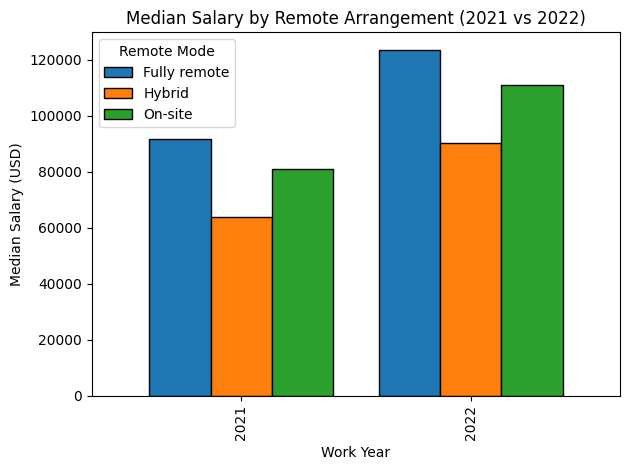

In [24]:
plt.figure(figsize=(8,5))
med_remote.drop(columns=["remote_premium_abs", "remote_premium_pct"]).plot(
    kind="bar", edgecolor="black", width=0.8
)
plt.title("Median Salary by Remote Arrangement (2021 vs 2022)")
plt.xlabel("Work Year")
plt.ylabel("Median Salary (USD)")
plt.legend(title="Remote Mode", loc="upper left")
plt.tight_layout()
plt.show()


In 2021, it is noticeable that:

- The On-site bar is higher than Hybrid but clearly shorter than Fully remote.

- The Fully remote bar stands out as the tallest, confirming that remote jobs had a pay edge.

Moving to 2022, all three bars are taller, showing that salaries rose across the board.
But the pattern shifted subtly:

- On-site pay increased substantially, narrowing the visual gap with Fully remote.

- Hybrid pay jumped even more in relative terms, almost catching up to On-site.

This means that while Fully remote is still the highest, the difference between on-site and fully remote shrank proportionally, even though the dollar gap grew. In raw dollars, remote work continued to lead, and its advantage grew from ~$10.6k to ~$12.7k. However, the percentage gap, which is evident in the proportional height of the bar, slightly decreased. The result reflects a market adjusting as remote work became mainstream and companies increased in-office pay to stay competitive.

The chart illustrates that while remote work remained the best-paid option in 2022, the relative gap shrank as on-site salaries caught up faster, and the absolute pay difference continued to increase.

## EDA Question 4: How do `experience_level`, and `company_size` collectively influence salary in USD from 2021-2022?

### Question 4 Visualizations

In [25]:
df.experience_level.value_counts()

experience_level
Senior-level          243
Mid-level             208
Entry-level/Junior     88
Executive              26
Name: count, dtype: int64

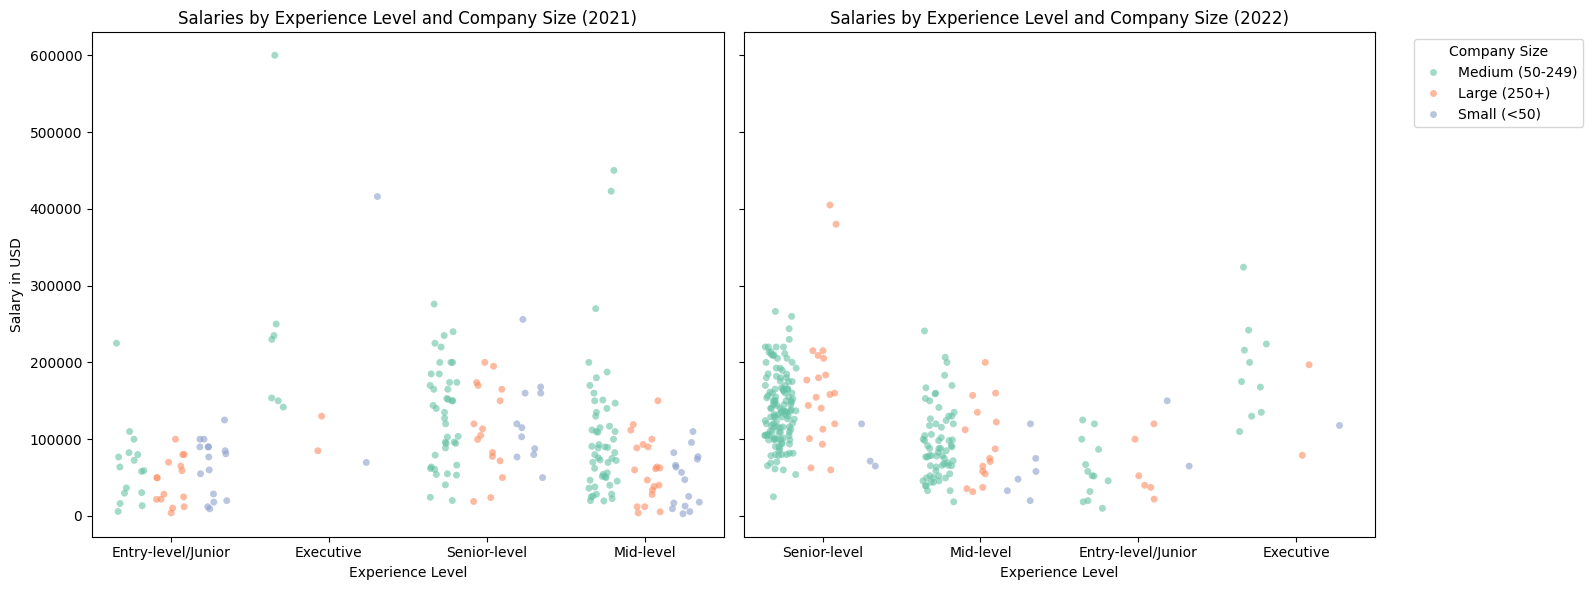

In [26]:
df_plot = df.copy()
df_2021 = df_plot[df_plot['work_year'] == 2021]
df_2022 = df_plot[df_plot['work_year'] == 2022]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 2021
sns.stripplot(
    data=df_2021,
    x='experience_level',
    y='salary_in_usd',
    hue='company_size',
    jitter=0.3,
    dodge=True,
    alpha=0.6,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title("Salaries by Experience Level and Company Size (2021)")
axes[0].set_xlabel("Experience Level")
axes[0].set_ylabel("Salary in USD")
axes[0].legend_.remove() 

sns.stripplot(
    data=df_2022,
    x='experience_level',
    y='salary_in_usd',
    hue='company_size',
    jitter=0.3,
    dodge=True,
    alpha=0.6,
    palette='Set2',
    ax=axes[1]
)
axes[1].set_title("Salaries by Experience Level and Company Size (2022)")
axes[1].set_xlabel("Experience Level")
axes[1].set_ylabel("")  
axes[1].legend(title="Company Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This plot allows us to make some key observations across all four experience levels and three company size categories

1. **Entry Level/Junior**
    * Salaries are generally lower, with most data points within this category below 100,000 USD.

2. **Mid-level**
    * Salaries in the mid-level experience level now show a wider spread, althought it is more dense just below the 100,000 mark, most of it still being under the 100,000 - 120,000 mark
    * Medium and Large sized companies appear to offer more salaries to mid-level experience employees rather than small-sized companies

3. **Senior-level**
    * Salaries are higher, with it being more dense in the 100,000-200,000 range
    * Medium companies seem to hire more employees with Senior-level experience than other sized companies
    * In 2022, we can see that there is a big difference in the amount of senior-level employees being hired by medium-sized companies as opposed to small and large sized companies

4. **Executive**
    * It seems that the number of data points for employees with this experience level is quite sparse in both years

>**Low Outliers**: Interestingly, there are some data points, particularly at senior and executive levels, that appear relatively low compared to others at the same experience level. This could indicate a wide range of roles within each "level" (which may be seen in `job_title`) or other influencing factors.

<hr>

## EDA Question 5: While categorizing Data Science Jobs into 5 categories (Data Science, ML/AI, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), how does job category influence median job salaries during 2021-2022?

### Categorizing the data into their respective job categories

In [27]:
def categorize_job_title(job_title):

    ds_keywords = [
        'data scientist', 'research scientist', 'applied data scientist',
        'staff data scientist', 'data science consultant', 'data science engineer'
    ]

    ml_keywords = [
        'machine learning engineer', 'ai scientist', 'machine learning scientist',
        'applied machine learning scientist', 'machine learning developer', 
        'computer vision engineer', 'ml engineer', 'computer vision software engineer',
        'nlp engineer', 'lead machine learning engineer',
        '3d computer vision researcher', 'machine learning manager', 
        'machine learning infrastructure engineer' 
    ]

    de_arch_keywords = [
        'data engineer', 'big data engineer', 'data architect', 'lead data engineer',
        'cloud data engineer', 'etl developer', 'big data architect'
    ]

    da_keywords = [
        'data analyst', 'bi data analyst', 'business data analyst',
        'data analytics engineer', 'analytics engineer', 'lead data analyst',
        'product data analyst', 'financial data analyst',
        'marketing data analyst', 'data specialist', 'finance data analyst',
        'data analytics lead', 'data analytics manager'
    ]

    leadership_management_keywords = [
        'data science manager', 'director of data science', 'head of data',
        'data engineering manager', 'head of data science',
        'director of data engineering', 'machine learning manager',
        'head of machine learning', 'principal data scientist', 'principal data engineer',
        'principal data analyst'
    ]

    if any(keyword in job_title for keyword in ds_keywords):
        return "Data Science"
    elif any(keyword in job_title for keyword in ml_keywords):
        return "Machine Learning / AI"
    elif any(keyword in job_title for keyword in de_arch_keywords):
        return "Data Engineering / Architecture"
    elif any(keyword in job_title for keyword in da_keywords):
        return "Data Analytics / Business Intelligence"
    elif any(keyword in job_title for keyword in leadership_management_keywords):
        return "Leadership / Management"
    else:
        return "Other"

In [28]:
eda5_df = df[df['work_year'].isin([2021, 2022])].copy()
eda5_df['job_title'] = eda5_df['job_title'].str.lower()
eda5_df['job_category'] = eda5_df['job_title'].apply(categorize_job_title)

eda5_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
72,2021,Entry-level/Junior,Full-time,research scientist,60000,GBP,82528,GB,Hybrid,GB,Large (250+),Data Science
73,2021,Executive,Full-time,bi data analyst,150000,USD,150000,IN,Fully remote,US,Large (250+),Data Analytics / Business Intelligence
74,2021,Executive,Full-time,head of data,235000,USD,235000,US,Fully remote,US,Large (250+),Leadership / Management
75,2021,Senior-level,Full-time,data scientist,45000,EUR,53192,FR,Hybrid,FR,Large (250+),Data Science
76,2021,Mid-level,Full-time,bi data analyst,100000,USD,100000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,data engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture
603,2022,Senior-level,Full-time,data engineer,126000,USD,126000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture
604,2022,Senior-level,Full-time,data analyst,129000,USD,129000,US,On-site,US,Medium (50-249),Data Analytics / Business Intelligence
605,2022,Senior-level,Full-time,data analyst,150000,USD,150000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence


### Question 5 Visualizations

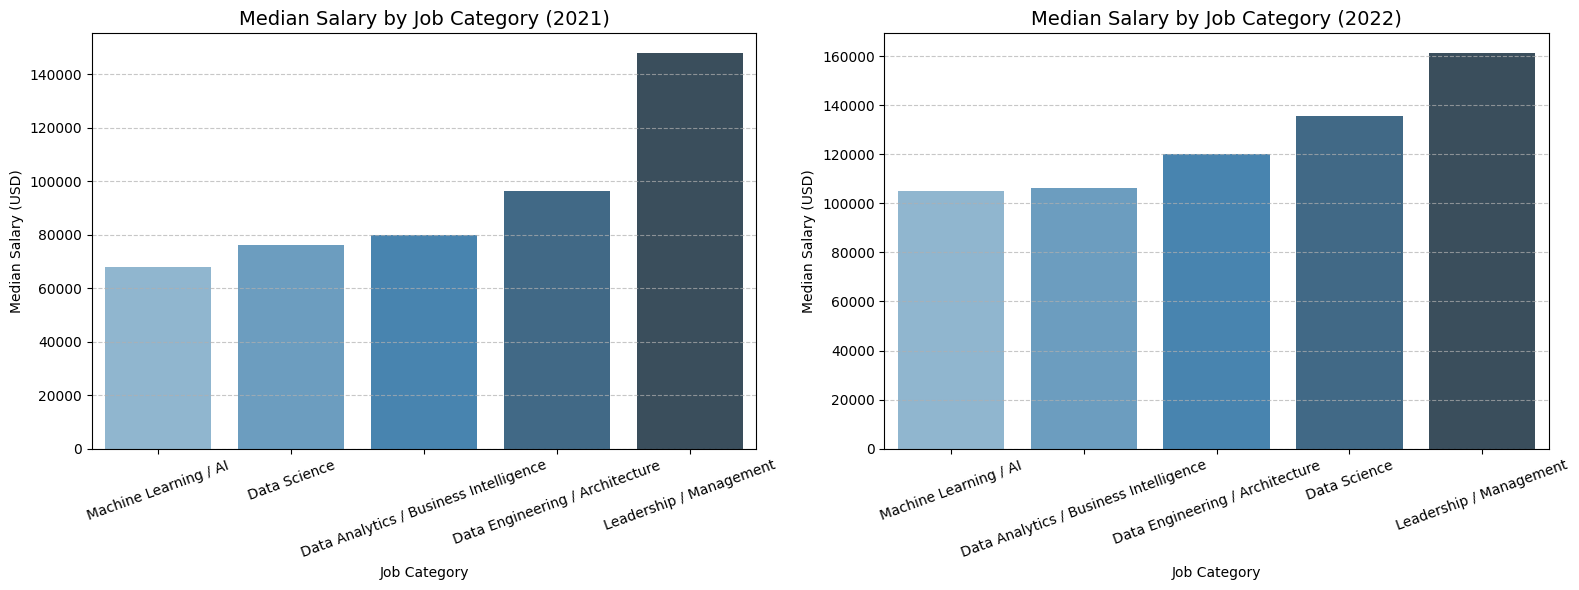

In [29]:
median_salaries = eda5_df.groupby(['work_year', 'job_category'])['salary_in_usd'].median().reset_index()

median_2021 = median_salaries[median_salaries['work_year'] == 2021].sort_values('salary_in_usd')
median_2022 = median_salaries[median_salaries['work_year'] == 2022].sort_values('salary_in_usd')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.barplot(
    data=median_2021,
    x='job_category',
    y='salary_in_usd',
    hue='job_category',       
    palette='Blues_d',
    legend=False,             
    ax=axes[0]
)
axes[0].set_title('Median Salary by Job Category (2021)', fontsize=14)
axes[0].set_xlabel('Job Category')
axes[0].set_ylabel('Median Salary (USD)')
axes[0].tick_params(axis='x', rotation=20)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7)

sns.barplot(
    data=median_2022,
    x='job_category',
    y='salary_in_usd',
    hue='job_category',       
    palette='Blues_d',
    legend=False,             
    ax=axes[1]
)

axes[1].set_title('Median Salary by Job Category (2022)', fontsize=14)
axes[1].set_xlabel('Job Category')
axes[1].set_ylabel('Median Salary (USD)')
axes[1].tick_params(axis='x', rotation=20)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


These two plots gives us an insight into how the median job salary in 2021 and 2022 are influenced by the job category. Through this, we can pinpoint variables such as the spread of salaries across the job categories, and then compare them between 2021 and 2022 to see the shifts in trends of demand of Data Science professionals during the post-pandemic years. From these visualizations, we were able to garner the following insights:

* A common factor between the 2 years is that jobs within the `Leadership/Management` category have the highest median salary.
* All job categories had an increase of ≥20,000 USD from 2021 to 2022.
* The `Data Science` job category had the highest jump from 2021 to 2022. In 2021, the median salary for that category was just below 80,000 USD. In 2022, the median salary for the `Data Science` job category jumped up to the second highest, with an average job salary of ~138,000 USD.
* The spread between the median salaries of all job categories have decreased in 2022 as a result of all of them jumping into the 6-digit salary range. This implies that the demand for data science professioanals across all specializations within the field are growing.

<hr>

# Research Question

## For distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary_in_usd significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions, between 2021 and 2022?

## Additional Preprocessing Steps

### Filtering the Dataframe to only include rows from 2021 to 2022

Including rows from 2021 to 2022 provides a clearer and more reliable basis for analysis because these years reflect a more stabilized post-pandemic job market with significantly larger sample sizes compared to 2020, which has only 72 entries and represents a period of economic disruption and hiring uncertainty. By focusing on 2021 and 2022, the risk of skewing trends due to early-pandemic anomalies is reduced and ensure that observed salary patterns are more representative of recent, normalized market conditions, making insights drawn from the data more meaningful and generalizable.

In [30]:
df_2021_2022 = df[df["work_year"].isin([2021, 2022])]
df_2021_2022

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
72,2021,Entry-level/Junior,Full-time,Research Scientist,60000,GBP,82528,GB,Hybrid,GB,Large (250+)
73,2021,Executive,Full-time,Bi Data Analyst,150000,USD,150000,IN,Fully remote,US,Large (250+)
74,2021,Executive,Full-time,Head Of Data,235000,USD,235000,US,Fully remote,US,Large (250+)
75,2021,Senior-level,Full-time,Data Scientist,45000,EUR,53192,FR,Hybrid,FR,Large (250+)
76,2021,Mid-level,Full-time,Bi Data Analyst,100000,USD,100000,US,Fully remote,US,Medium (50-249)
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,Data Engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249)
603,2022,Senior-level,Full-time,Data Engineer,126000,USD,126000,US,Fully remote,US,Medium (50-249)
604,2022,Senior-level,Full-time,Data Analyst,129000,USD,129000,US,On-site,US,Medium (50-249)
605,2022,Senior-level,Full-time,Data Analyst,150000,USD,150000,US,Fully remote,US,Medium (50-249)


### Categorizing data points into job categories

The raw `job_title` column contains many variations, by grouping them into categories based on specialization we create a new feature `job_category`, which will help our analyses by providing a structured variable to compare characteristics across role types, reducing noise from the `job_title` column.

In [31]:
df_2021_2022['job_title'] = df_2021_2022['job_title'].str.lower()
df_2021_2022['job_category'] = df_2021_2022['job_title'].apply(categorize_job_title)
df_2021_2022

/tmp/ipykernel_52/2965407298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['job_title'] = df_2021_2022['job_title'].str.lower()
/tmp/ipykernel_52/2965407298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['job_category'] = df_2021_2022['job_title'].apply(categorize_job_title)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
72,2021,Entry-level/Junior,Full-time,research scientist,60000,GBP,82528,GB,Hybrid,GB,Large (250+),Data Science
73,2021,Executive,Full-time,bi data analyst,150000,USD,150000,IN,Fully remote,US,Large (250+),Data Analytics / Business Intelligence
74,2021,Executive,Full-time,head of data,235000,USD,235000,US,Fully remote,US,Large (250+),Leadership / Management
75,2021,Senior-level,Full-time,data scientist,45000,EUR,53192,FR,Hybrid,FR,Large (250+),Data Science
76,2021,Mid-level,Full-time,bi data analyst,100000,USD,100000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,data engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture
603,2022,Senior-level,Full-time,data engineer,126000,USD,126000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture
604,2022,Senior-level,Full-time,data analyst,129000,USD,129000,US,On-site,US,Medium (50-249),Data Analytics / Business Intelligence
605,2022,Senior-level,Full-time,data analyst,150000,USD,150000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence


### Tech Hub Binning

To capture potential regional salary advantages, we created a binary feature company_location_tech_hub that identifies whether a job's company is located in a globally recognized tech hub. The list of tech hubs was based on external domain knowledge, referencing countries frequently cited as technology and innovation centers.

The new feature assigns a value of 1 to companies based in countries like the US, Germany (DE), China (CN), and others commonly associated with strong tech ecosystems, and 0 otherwise. This binning allows the models to account for geographic influence on salary without introducing too many sparse country-level categories. It simplifies the location signal and helps answer the research question by isolating whether being in a tech-centric environment affects salary outcomes.

todo: explanation

In [32]:
# based on the top 10 tech hubs in the world
# source: domain knowledge -https://allenrec.com/technology-hub-countries/

tech_hubs = ['US', 'DE', 'CN', 'FR', 'NL', 'ES', 'JP', 'AU']

# bin the company_location column
df_2021_2022['company_location_tech_hub'] = df_2021_2022['company_location'].apply(lambda x: 1 if x in tech_hubs else 0)

df_2021_2022

/tmp/ipykernel_52/1094335165.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_2022['company_location_tech_hub'] = df_2021_2022['company_location'].apply(lambda x: 1 if x in tech_hubs else 0)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_tech_hub
72,2021,Entry-level/Junior,Full-time,research scientist,60000,GBP,82528,GB,Hybrid,GB,Large (250+),Data Science,0
73,2021,Executive,Full-time,bi data analyst,150000,USD,150000,IN,Fully remote,US,Large (250+),Data Analytics / Business Intelligence,1
74,2021,Executive,Full-time,head of data,235000,USD,235000,US,Fully remote,US,Large (250+),Leadership / Management,1
75,2021,Senior-level,Full-time,data scientist,45000,EUR,53192,FR,Hybrid,FR,Large (250+),Data Science,1
76,2021,Mid-level,Full-time,bi data analyst,100000,USD,100000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,data engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1
603,2022,Senior-level,Full-time,data engineer,126000,USD,126000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1
604,2022,Senior-level,Full-time,data analyst,129000,USD,129000,US,On-site,US,Medium (50-249),Data Analytics / Business Intelligence,1
605,2022,Senior-level,Full-time,data analyst,150000,USD,150000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence,1


### Handling Outliers

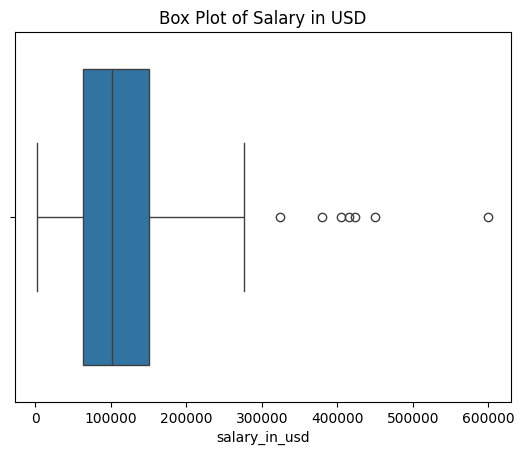

In [33]:
import seaborn as sns

sns.boxplot(x=df_2021_2022["salary_in_usd"])
plt.title("Box Plot of Salary in USD")
plt.show()


The box plot of salary_in_usd revealed the presence of extreme outliers, primarily in the upper tail of the salary distribution. Using the interquartile range (IQR) method, we identified 7 salaries that fell significantly outside the normal range, exceeding 1.5×IQR above the third quartile. These outliers had salaries ranging from $324,000 to $600,000 USD, mostly tied to senior or executive-level roles.

In [34]:
Q1 = df_2021_2022["salary_in_usd"].quantile(0.25)
Q3 = df_2021_2022["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select outlier rows
outliers = df_2021_2022[
    (df_2021_2022["salary_in_usd"] < lower_bound) |
    (df_2021_2022["salary_in_usd"] > upper_bound)
]

outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_tech_hub
97,2021,Mid-level,Full-time,financial data analyst,450000,USD,450000,US,Fully remote,US,Large (250+),Data Analytics / Business Intelligence,1
157,2021,Mid-level,Full-time,applied machine learning scientist,423000,USD,423000,US,Hybrid,US,Large (250+),Machine Learning / AI,1
225,2021,Executive,Contract,principal data scientist,416000,USD,416000,US,Fully remote,US,Small (<50),Data Science,1
252,2021,Executive,Full-time,principal data engineer,600000,USD,600000,US,Fully remote,US,Large (250+),Data Engineering / Architecture,1
482,2022,Executive,Full-time,data engineer,324000,USD,324000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1
519,2022,Senior-level,Full-time,applied data scientist,380000,USD,380000,US,Fully remote,US,Large (250+),Data Science,1
523,2022,Senior-level,Full-time,data analytics lead,405000,USD,405000,US,Fully remote,US,Large (250+),Data Analytics / Business Intelligence,1


### Removal of Outliers

In [35]:
# remoe the outliers from df_2021_2022, based on the outliers dataframe
print(f"Before: {len(df_2021_2022)} rows")
df_2021_2022 = df_2021_2022.drop(outliers.index)
print(f"After: {len(df_2021_2022)} rows")

Before: 493 rows
After: 486 rows


### Justification for the Removal of Outliers

Given that the total dataset only contains 493 rows, and that outliers represent less than 1.5% of the data, their removal was carefully considered. These high-end outliers have the potential to distort the model's training process, inflate RMSE, and cause skewed coefficient estimates in linear and polynomial regression. More importantly, they could misrepresent the general salary patterns for most data-related roles, which are concentrated in a lower range.

Removing these outliers reduced the dataset to 486 rows, preserving the integrity of the sample while hoping to improve model stability. This step ensures that our analysis focuses on typical salary ranges and avoids misleading predictions driven by rare, high-compensation extreme cases.

### Model Features and Label Setup

To prepare the dataset for modeling, we selected a set of relevant categorical features based on the research question: experience_level, company_size, remote_ratio, and company_location_tech_hub. The target variable salary_in_usd was selected as the label we aim to predict.

In [36]:
X = df_2021_2022[[
    'experience_level',
    'company_size',
    'remote_ratio',
    'company_location_tech_hub',
    'job_category'
]]

y = df_2021_2022['salary_in_usd']

### Dummy Encoding Features

Since the selected features are categorical, we used one-hot encoding via pd.get_dummies() to convert them into binary variables suitable for regression. The drop_first=True parameter avoids multicollinearity by excluding one category per feature. This encoding allows models to interpret each category as a separate independent variable during training.

In [37]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [38]:
X_encoded

,company_location_tech_hub,experience_level_Executive,experience_level_Mid-level,experience_level_Senior-level,company_size_Medium (50-249),company_size_Small (<50),remote_ratio_Hybrid,remote_ratio_On-site,job_category_Data Engineering / Architecture,job_category_Data Science,job_category_Leadership / Management,job_category_Machine Learning / AI
72,0,False,False,False,False,False,True,False,False,True,False,False
73,1,True,False,False,False,False,False,False,False,False,False,False
74,1,True,False,False,False,False,False,False,False,False,True,False
75,1,False,False,True,False,False,True,False,False,True,False,False
76,1,False,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
602,1,False,False,True,True,False,False,False,True,False,False,False
603,1,False,False,True,True,False,False,False,True,False,False,False
604,1,False,False,True,True,False,False,True,False,False,False,False
605,1,False,False,True,True,False,False,False,False,False,False,False


### Train Test Split

We split the dataset into training and testing sets using an 80/20 ratio. The training set will be used to fit the models, while the test set will be used to evaluate generalization performance. A fixed  random_state=42  ensures reproducibility of results across different runs.

In [39]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Function for Model Performance on Train and Test Sets

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model", inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Always calculate R² and RMSE based on provided labels
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"\n{name} Performance:")

    if inverse:
        # Print log-space metrics
        print(f"Train R² (log-space): {train_r2:.4f}")
        print(f"Test R²  (log-space): {test_r2:.4f}")
        print(f"Train RMSE (log-space): {train_rmse:.2f}")
        print(f"Test RMSE  (log-space): {test_rmse:.2f}")

        # Also compute RMSE in original scale
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        train_rmse_orig = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        test_rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

        print(f"Train RMSE (original scale): {train_rmse_orig:.2f}")
        print(f"Test RMSE  (original scale): {test_rmse_orig:.2f}")
    else:
        # For non-transformed targets, show just normal metrics
        print(f"Train R²:  {train_r2:.4f}")
        print(f"Test R²:   {test_r2:.4f}")
        print(f"Train RMSE: {train_rmse:.2f}")
        print(f"Test RMSE:  {test_rmse:.2f}")


# Data Modeling: Prediction Model

### Linear Regression Model 

In [41]:
from sklearn.linear_model import LinearRegression

We begin by fitting a baseline Linear Regression model using the selected features: experience_level, company_size, remote_ratio, and company_location_tech_hub. This serves as our starting point to evaluate how well a simple linear model captures the relationship between these predictors and salary. The performance metrics (R² and RMSE) will help us assess both the goodness of fit and prediction error. This step is essential to set a benchmark when we start improving the model.

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_train, X_test, y_train, y_test, "Linear Regression")


Linear Regression Performance:
Train R²:  0.4777
Test R²:   0.4773
Train RMSE: 43058.16
Test RMSE:  40837.62


### Model Predictions

In [43]:
predictions = model.predict(X_encoded)

df_2021_2022["predicted_salary"] = predictions

In [44]:
df_2021_2022

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_tech_hub,predicted_salary
72,2021,Entry-level/Junior,Full-time,research scientist,60000,GBP,82528,GB,Hybrid,GB,Large (250+),Data Science,0,29976.441836
73,2021,Executive,Full-time,bi data analyst,150000,USD,150000,IN,Fully remote,US,Large (250+),Data Analytics / Business Intelligence,1,159999.104811
74,2021,Executive,Full-time,head of data,235000,USD,235000,US,Fully remote,US,Large (250+),Leadership / Management,1,202246.145421
75,2021,Senior-level,Full-time,data scientist,45000,EUR,53192,FR,Hybrid,FR,Large (250+),Data Science,1,134884.240567
76,2021,Mid-level,Full-time,bi data analyst,100000,USD,100000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence,1,90119.123112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,Full-time,data engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1,154072.606856
603,2022,Senior-level,Full-time,data engineer,126000,USD,126000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1,154072.606856
604,2022,Senior-level,Full-time,data analyst,129000,USD,129000,US,On-site,US,Medium (50-249),Data Analytics / Business Intelligence,1,126553.741651
605,2022,Senior-level,Full-time,data analyst,150000,USD,150000,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence,1,128882.466323


### Visualizing the Performance of our Regression Model

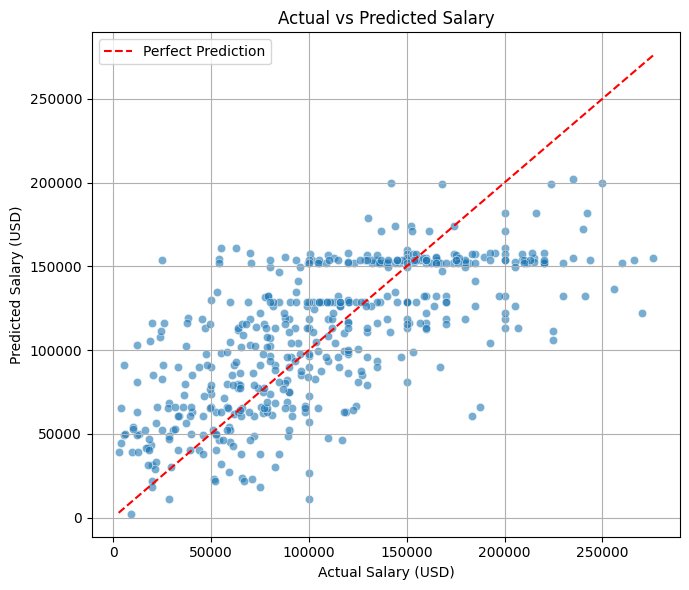

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=df_2021_2022["salary_in_usd"],
    y=df_2021_2022["predicted_salary"],
    alpha=0.6
)
plt.plot([df_2021_2022["salary_in_usd"].min(), df_2021_2022["salary_in_usd"].max()],
         [df_2021_2022["salary_in_usd"].min(), df_2021_2022["salary_in_usd"].max()],
         color='red', linestyle='--', label="Perfect Prediction")

plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot above shows how well our linear regression model predicted salaries compared to the actual values from the dataset.

- Each point represents one job entry, with the actual salary on the x-axis and the predicted salary on the y-axis.

- The red dashed line represents perfect predictions — if all points were on this line, the model would be 100% accurate.

This plot reveals that many predicted salaries cluster around certain values, and there is noticeable deviation from the red line, especially at higher salary levels. This suggests that the model struggles to generalize across the full salary range and may be underfitting. The systematic errors point to missing variables or non-linear patterns that a simple linear model cannot capture, reinforcing the need to explore more flexible models in the next steps.

### Predicting Salaries Based on User Input

In [46]:
for col in X.columns:
    print(col)
    print(X[col].unique())

experience_options = X["experience_level"].unique().tolist()
company_size_options = X["company_size"].unique().tolist()
remote_options = X["remote_ratio"].unique().tolist()
company_location_tech_hub_options = X["company_location_tech_hub"].unique().tolist()

experience_level
['Entry-level/Junior' 'Executive' 'Senior-level' 'Mid-level']
company_size
['Large (250+)' 'Medium (50-249)' 'Small (<50)']
remote_ratio
['Hybrid' 'Fully remote' 'On-site']
company_location_tech_hub
[0 1]
job_category
['Data Science' 'Data Analytics / Business Intelligence'
 'Leadership / Management' 'Machine Learning / AI'
 'Data Engineering / Architecture']


In [47]:
remote_type_input = 'Hybrid'

In [48]:
company_location_tech_hub_input = '1'

In [49]:
experience_level_input = 'Executive'

In [50]:
company_size_input = 'Small (<50)'

In [51]:
job_category_input = 'Data Science'

In [52]:
user_input = pd.DataFrame([{
    'experience_level': experience_level_input,
    'company_size': company_size_input,
    'remote_ratio': remote_type_input,
    'company_location_tech_hub': company_location_tech_hub_input,
    'job_category': job_category_input
}])

user_encoded = pd.get_dummies(user_input)

user_encoded = user_encoded.reindex(columns=X_encoded.columns, fill_value=0)

predicted_salary = model.predict(user_encoded)[0]

print(f"Predicted Salary (USD): ${predicted_salary:,.2f}")

Predicted Salary (USD): $87,985.62


## Model Improvements

In [53]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Regularization - Ridge Regression

In [54]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

evaluate_model(ridge_model, X_train, X_test, y_train, y_test, "Ridge Regression")


Ridge Regression Performance:
Train R²:  0.4770
Test R²:   0.4778
Train RMSE: 43090.14
Test RMSE:  40818.62


### Regularization - Lasso Regression

In [55]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

evaluate_model(lasso_model, X_train, X_test, y_train, y_test, "Lasso Regression")


Lasso Regression Performance:
Train R²:  0.4777
Test R²:   0.4773
Train RMSE: 43058.16
Test RMSE:  40837.63


Regularization yields negligible change vs our linear model, proving that there isn't much overfitting and that these four features explain only 47% of the salary variance (based on the R^2 value). Simply penalizing coefficients will not improve generalization, hinting that the predictive performance may be capped by the choices of relevant features, not the model complexity.

### Target Transformation - Log Transformation

Salary values in the dataset are very spread out, with a few really high numbers that can throw off the model. Taking the log of the salary helps to reduce this gap and make the data more balanced. This makes it easier for the model to learn patterns without being too influenced by extreme values. It also helps reduce error and improve prediction results overall.

In [56]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [57]:
# normal linear regression refit

log_model = LinearRegression()
log_model.fit(X_train, y_train_log)

evaluate_model(log_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Linear Regression", inverse=True)


Log-Transformed Linear Regression Performance:
Train R² (log-space): 0.4411
Test R²  (log-space): 0.4651
Train RMSE (log-space): 0.58
Test RMSE  (log-space): 0.48
Train RMSE (original scale): 44460.72
Test RMSE  (original scale): 43942.33


### Log Transformation with Regularization

In [58]:
log_ridge_model = Ridge(alpha=1.0)
log_ridge_model.fit(X_train, y_train_log)

evaluate_model(log_ridge_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Ridge Regression", inverse=True)


Log-Transformed Ridge Regression Performance:
Train R² (log-space): 0.4404
Test R²  (log-space): 0.4704
Train RMSE (log-space): 0.58
Test RMSE  (log-space): 0.48
Train RMSE (original scale): 44554.25
Test RMSE  (original scale): 43443.86


In [59]:
log_lasso_model = Lasso(alpha=0.1)
log_lasso_model.fit(X_train, y_train_log)

evaluate_model(log_lasso_model, X_train, X_test, y_train_log, y_test_log, "Log-Transformed Lasso Regression", inverse=True)


Log-Transformed Lasso Regression Performance:
Train R² (log-space): 0.2248
Test R²  (log-space): 0.2654
Train RMSE (log-space): 0.68
Test RMSE  (log-space): 0.56
Train RMSE (original scale): 55443.67
Test RMSE  (original scale): 52420.99


A Log-transform did not show any improvements compared to the models without this step, and even showed worse results especially on the lasso model.

### Hyperparameter Tuning - GridSearchCV

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Store best models
best_models = {}

# Helper to evaluate models
def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Grid search for each model
search_results = []

# Normal Linear Regression (no hyperparams)
lr = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])
lr.fit(X_train, y_train)
search_results.append(evaluate("Linear Regression", lr, X_train, X_test, y_train, y_test))

# Lasso Regression
lasso_params = {
    "reg__alpha": np.linspace(0.0001, 1.0, 10),
    "reg__max_iter": [500, 1000, 5000],
    "reg__tol": [1e-4, 1e-3, 1e-2]
}
lasso = Pipeline([("scaler", StandardScaler()), ("reg", Lasso())])
lasso_search = GridSearchCV(lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
lasso_search.fit(X_train, y_train)
search_results.append(evaluate("Lasso", lasso_search.best_estimator_, X_train, X_test, y_train, y_test))
best_models["Lasso"] = lasso_search.best_estimator_

# Ridge Regression
ridge_params = {
    "reg__alpha": np.linspace(0.01, 10.0, 10),
    "reg__solver": ["auto", "svd", "cholesky", "lsqr", "sag"],
    "reg__tol": [1e-3, 1e-2, 1e-1]
}
ridge = Pipeline([("scaler", StandardScaler()), ("reg", Ridge())])
ridge_search = GridSearchCV(ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
ridge_search.fit(X_train, y_train)
search_results.append(evaluate("Ridge", ridge_search.best_estimator_, X_train, X_test, y_train, y_test))
best_models["Ridge"] = ridge_search.best_estimator_

# Log-Linear Regression
log_lr = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])
log_lr.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Linear", log_lr, X_train, X_test, y_train_log, y_test_log, inverse=True))

# Log-Lasso Regression
log_lasso = Pipeline([("scaler", StandardScaler()), ("reg", Lasso())])
log_lasso_search = GridSearchCV(log_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
log_lasso_search.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Lasso", log_lasso_search.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
best_models["Log-Lasso"] = log_lasso_search.best_estimator_

# Log-Ridge Regression
log_ridge = Pipeline([("scaler", StandardScaler()), ("reg", Ridge())])
log_ridge_search = GridSearchCV(log_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
log_ridge_search.fit(X_train, y_train_log)
search_results.append(evaluate("Log-Ridge", log_ridge_search.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True))
best_models["Log-Ridge"] = log_ridge_search.best_estimator_

import pandas as pd
df_results = pd.DataFrame(search_results)

df_results


,name,train_r2,test_r2,train_rmse,test_rmse,train_rmse_orig,test_rmse_orig
0,Linear Regression,0.477737,0.477342,43058.163464,40837.624235,NaN,NaN
1,Lasso,0.477737,0.477339,43058.163896,40837.740861,NaN,NaN
2,Ridge,0.476571,0.480653,43106.223478,40708.082092,NaN,NaN
3,Log-Linear,0.441051,0.465078,0.575979,0.481049,44460.716809,43942.331634
4,Log-Lasso,0.441050,0.465210,0.575979,0.480990,44464.700046,43939.963837
5,Log-Ridge,0.440182,0.460358,0.576426,0.483167,44496.081228,44037.155510


Even if exhaustively searching for the best hyperparameters barely moves the R^2 and test RMSE scores, it really shows that the model is not the bottleneck. We can now focus our shift to increasing model complexity, which could potentially fit to our non-linear dataset.

In [61]:
best_models["Ridge"].get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('reg', Ridge(alpha=5.5600000000000005, solver='sag', tol=0.1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'reg': Ridge(alpha=5.5600000000000005, solver='sag', tol=0.1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'reg__alpha': 5.5600000000000005,
 'reg__copy_X': True,
 'reg__fit_intercept': True,
 'reg__max_iter': None,
 'reg__normalize': 'deprecated',
 'reg__positive': False,
 'reg__random_state': None,
 'reg__solver': 'sag',
 'reg__tol': 0.1}

## Increasing Model Complexity

The marginal improvements from hyperparameter tuning suggest that our current linear models are reaching their limit. This points to a more fundamental issue: the relationship between the selected features and salary may not be strictly linear. To capture more nuanced patterns, we now shift our focus to increasing model complexity, utilizing polynomial regression to introduce interaction and non-linear terms.

### Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [63]:
# Degree-2 Polynomial Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

# Evaluate performance
evaluate_model(poly_model, X_train, X_test, y_train, y_test, name="Polynomial Regression (degree=2)")



Polynomial Regression (degree=2) Performance:
Train R²:  0.5546
Test R²:   0.4106
Train RMSE: 39764.18
Test RMSE:  43366.70


This degree-2 polynomial model introduces non-linear terms and pairwise interactions between features. While it improves the training R² to 0.5538, the test R^2 drops significantly to 0.4094, with a corresponding increase in RMSE. This large gap between training and test performance indicates overfitting, where the model learns patterns in the training data that do not generalize well. It suggests that the added complexity from quadratic terms captures noise rather than meaningful structure.

### Severe Overfitting - Degree 5

In [64]:
# Degree-5 Polynomial Regression
poly_model = make_pipeline(
    PolynomialFeatures(degree=5, include_bias=False),
    LinearRegression()
)

poly_model.fit(X_train, y_train)

# Evaluate performance
evaluate_model(poly_model, X_train, X_test, y_train, y_test, name="Polynomial Regression (degree=5)")



Polynomial Regression (degree=5) Performance:
Train R²:  0.6610
Test R²:   -114541508891831512858624.0000
Train RMSE: 34691.41
Test RMSE:  19117591079302548.00


Increasing the polynomial degree to 5 pushes the model further into overfitting. The test R² becomes negative, meaning the model performs worse than a naive mean predictor on the test set. Although the training R^2 improves slightly, this still does not translate into useful generalization. This extreme case reinforces the importance of controlling model complexity, especially when the dataset is not large enough to support high-order interactions.

### Polynomial Regression With Regularization

In [65]:
poly_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

poly_ridge_model.fit(X_train, y_train)
evaluate_model(poly_ridge_model, X_train, X_test, y_train, y_test, name="Polynomial Ridge (degree=2)")


Polynomial Ridge (degree=2) Performance:
Train R²:  0.5529
Test R²:   0.4614
Train RMSE: 39839.63
Test RMSE:  41456.04


In [66]:
poly_lasso_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.15)
)

poly_lasso_model.fit(X_train, y_train)
evaluate_model(poly_lasso_model, X_train, X_test, y_train, y_test, name="Polynomial Lasso (degree=2)")


Polynomial Lasso (degree=2) Performance:
Train R²:  0.5581
Test R²:   0.4270
Train RMSE: 39605.35
Test RMSE:  42759.52
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.462e+11, tolerance: 1.377e+08
  model = cd_fast.enet_coordinate_descent(


Adding L2 regularization (Ridge) to the degree-2 polynomial model helps stabilize the overfitting observed earlier. The test R² climbs back up to 0.4614, almost matching the best linear model while preserving non-linear interactions. This shows that regularization is effective at filtering out noisy polynomial terms and prioritizing more robust patterns.

L1 regularization (Lasso), on the other hand, underperforms and fails to converge cleanly, suggesting that it may be overly aggressive or that further tuning is needed.

### Log Transformation

In [67]:
poly_log_ridge_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

poly_log_ridge_model.fit(X_train, y_train_log)
evaluate_model(poly_log_ridge_model, X_train, X_test, y_train_log, y_test_log, name="Log-Polynomial Ridge (degree=2)", inverse=True)


Log-Polynomial Ridge (degree=2) Performance:
Train R² (log-space): 0.5586
Test R²  (log-space): 0.4844
Train RMSE (log-space): 0.51
Test RMSE  (log-space): 0.47
Train RMSE (original scale): 42099.12
Test RMSE  (original scale): 41278.25


In [68]:
poly_log_lasso_model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    Lasso(alpha=0.1)
)

poly_log_lasso_model.fit(X_train, y_train_log)
evaluate_model(poly_log_lasso_model, X_train, X_test, y_train_log, y_test_log, name="Log-Polynomial Lasso (degree=2)", inverse=True)



Log-Polynomial Lasso (degree=2) Performance:
Train R² (log-space): 0.2239
Test R²  (log-space): 0.2651
Train RMSE (log-space): 0.68
Test RMSE  (log-space): 0.56
Train RMSE (original scale): 55387.70
Test RMSE  (original scale): 52345.75


The log-transformed polynomial ridge model achieves the best overall performance so far, with a test R² of 0.4844 and a lower RMSE of 41278 on the original salary scale. This indicates that applying a log transformation to the target variable helps stabilize variance and reduce the effect of extreme values, leading to better generalization. 

The ridge model confirms that a moderate degree of non-linearity, combined with log-stabilization and regularization, provides the best trade-off between bias and variance, at the moment. 

To further attempt for model improvements, hyperparameter tuning efforts will be used again to determine the best configuration for our polynomial models.

### Polynomial Regression Hyperparameter Tuning - GridSearchCV 

In [69]:
# Re-import needed packages after kernel reset
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Evaluation function
def evaluate(name, model, X_train, X_test, y_train, y_test, inverse=False):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    result = {
        "name": name,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "train_rmse": train_rmse,
        "test_rmse": test_rmse,
    }

    if inverse:
        y_train_orig = np.expm1(y_train)
        y_test_orig = np.expm1(y_test)
        y_train_pred_orig = np.expm1(y_train_pred)
        y_test_pred_orig = np.expm1(y_test_pred)

        result["train_rmse_orig"] = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
        result["test_rmse_orig"] = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))

    return result

# Polynomial regression models
degrees = [2, 3, 4]
poly_results = []
poly_best_models = {}

for deg in degrees:
    # Linear
    poly_lr = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
    poly_lr.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Linear", poly_lr, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Linear"] = poly_lr

    # Ridge
    ridge_params = {
        "ridge__alpha": np.linspace(0.01, 10.0, 10),
        "ridge__tol": [1e-3, 1e-2, 1e-1],
        "ridge__solver": ["auto", "svd", "cholesky", "lsqr"]
    }
    poly_ridge = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Ridge())
    ridge_search = GridSearchCV(poly_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
    ridge_search.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Ridge", ridge_search.best_estimator_, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Ridge"] = ridge_search.best_estimator_

    # Lasso
    lasso_params = {
        "lasso__alpha": np.linspace(0.0001, 1.0, 10),
        "lasso__max_iter": [500, 1000],
        "lasso__tol": [1e-4, 1e-3, 1e-2]
    }
    poly_lasso = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Lasso())
    lasso_search = GridSearchCV(poly_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
    lasso_search.fit(X_train, y_train)
    poly_results.append(evaluate(f"Poly{deg}-Lasso", lasso_search.best_estimator_, X_train, X_test, y_train, y_test))
    poly_best_models[f"Poly{deg}-Lasso"] = lasso_search.best_estimator_

df_poly_results = pd.DataFrame(poly_results)


df_poly_results

  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+11, tolerance: 1.068e+10
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+11, tolerance: 1.119e+10
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation

,name,train_r2,test_r2,train_rmse,test_rmse
0,Poly2-Linear,0.554588,4.106010e-01,39764.178580,4.336670e+04
1,Poly2-Ridge,0.524577,4.907218e-01,41081.962770,4.031153e+04
2,Poly2-Lasso,0.558132,4.279500e-01,39605.653915,4.272369e+04
3,Poly3-Linear,0.605513,-4.701492e+23,37422.020549,3.873197e+16
4,Poly3-Ridge,0.520326,4.697645e-01,41265.224703,4.113259e+04
5,Poly3-Lasso,0.638553,-2.294009e-03,35820.639358,5.655217e+04
6,Poly4-Linear,0.654856,-7.611562e+22,35003.464314,1.558435e+16
7,Poly4-Ridge,0.484745,4.441638e-01,42768.305852,4.211387e+04
8,Poly4-Lasso,0.663326,3.885227e-01,34571.320223,4.417147e+04


In [70]:
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore warnings just to keep output clean (optional)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

degrees = [2, 3]
log_poly_results = []
log_poly_best_models = {}

for deg in degrees:
    print(f"Running Log-Poly Degree {deg}")

    # --- Log-Poly Linear ---
    try:
        log_poly_lr = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), LinearRegression())
        log_poly_lr.fit(X_train, y_train_log)
        log_poly_results.append(
            evaluate(f"Log-Poly{deg}-Linear", log_poly_lr, X_train, X_test, y_train_log, y_test_log, inverse=True)
        )
        log_poly_best_models[f"Log-Poly{deg}-Linear"] = log_poly_lr
    except Exception as e:
        print(f"[ERROR] Log-Poly{deg}-Linear failed: {e}")

    # --- Log-Poly Ridge ---
    try:
        log_poly_ridge = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Ridge())
        ridge_search_log = GridSearchCV(log_poly_ridge, ridge_params, cv=5, scoring="r2", n_jobs=-1)
        ridge_search_log.fit(X_train, y_train_log)
        log_poly_results.append(
            evaluate(f"Log-Poly{deg}-Ridge", ridge_search_log.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True)
        )
        log_poly_best_models[f"Log-Poly{deg}-Ridge"] = ridge_search_log.best_estimator_
    except Exception as e:
        print(f"[ERROR] Log-Poly{deg}-Ridge failed: {e}")

    # --- Log-Poly Lasso ---
    try:
        log_poly_lasso = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), Lasso())
        lasso_search_log = GridSearchCV(log_poly_lasso, lasso_params, cv=5, scoring="r2", n_jobs=-1)
        lasso_search_log.fit(X_train, y_train_log)
        log_poly_results.append(
            evaluate(f"Log-Poly{deg}-Lasso", lasso_search_log.best_estimator_, X_train, X_test, y_train_log, y_test_log, inverse=True)
        )
        log_poly_best_models[f"Log-Poly{deg}-Lasso"] = lasso_search_log.best_estimator_
    except Exception as e:
        print(f"[ERROR] Log-Poly{deg}-Lasso failed: {e}")

# Convert results to DataFrame
df_log_poly_results = pd.DataFrame(log_poly_results)

df_log_poly_results


Running Log-Poly Degree 2
Running Log-Poly Degree 3
/tmp/ipykernel_52/3670082144.py:33: RuntimeWarning: overflow encountered in expm1
  y_test_pred_orig = np.expm1(y_test_pred)
[ERROR] Log-Poly3-Linear failed: Input contains infinity or a value too large for dtype('float64').
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.628e+00, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+00, tolerance: 1.765e-02
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10

,name,train_r2,test_r2,train_rmse,test_rmse,train_rmse_orig,test_rmse_orig
0,Log-Poly2-Linear,0.561227,0.366587,0.510317,0.523465,42619.279186,46662.286259
1,Log-Poly2-Ridge,0.519742,0.524684,0.533897,0.453456,43021.491284,41797.701048
2,Log-Poly2-Lasso,0.564217,0.425898,0.508575,0.498355,41959.838157,43218.319023
3,Log-Poly3-Ridge,0.509586,0.483581,0.539513,0.472656,43533.290204,44249.339615
4,Log-Poly3-Lasso,0.197288,0.236432,0.690240,0.574736,56397.396438,53185.556649


The best model to come out of this training process was the Log-Polynomial Ridge Regression (degree=2), scoring the highest R^2 out of all the models (52.47%), as well as the lowest RMSE on the test set (41797.70).

### Where does the model make the largest mistakes?

To observe which instances can the model predict, and which instances do the model struggle with, as well as any patterns that emerge from these predictions, subsets of the dataframe will be created that would group the observations with the lowest and highest absolute prediction error.

In [122]:


best_model = log_poly_best_models[f"Log-Poly2-Lasso"]

df_2021_2022_pred = df_2021_2022.copy()

# dop the "predicted_salary" because it was generated by the baseline model
if "predicted_salary" in df_2021_2022_pred.columns:
    df_2021_2022_pred = df_2021_2022_pred.drop(columns=["predicted_salary"])
else:
    print("Column 'predicted_salary' not found in DataFrame. Skipping drop operation.")



df_2021_2022_pred["model_predictions_log"] = best_model.predict(X_encoded)

df_2021_2022_pred["model_predictions"] = np.expm1(df_2021_2022_pred["model_predictions_log"])

df_2021_2022_pred["prediction_error"] = df_2021_2022_pred["salary_in_usd"] - df_2021_2022_pred["model_predictions"]

df_2021_2022_pred["abs_error"] = df_2021_2022_pred["prediction_error"].abs()

high = df_2021_2022_pred.sort_values("abs_error", ascending=False).head(50)
low = df_2021_2022_pred.sort_values("abs_error", ascending=True).head(50)

In [125]:
low

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_tech_hub,model_predictions_log,model_predictions,prediction_error,abs_error
514,2022,Entry-level/Junior,Full-time,data analytics engineer,20000,USD,20000,PK,On-site,PK,Medium (50-249),Data Analytics / Business Intelligence,0,9.906794,20065.243543,-65.243543,65.243543
253,2021,Entry-level/Junior,Full-time,data scientist,2100000,INR,28399,IN,Fully remote,IN,Medium (50-249),Data Science,0,10.258303,28517.339547,-118.339547,118.339547
116,2021,Mid-level,Full-time,data scientist,50000,USD,50000,NG,Fully remote,NG,Large (250+),Data Science,0,10.817309,49875.693961,124.306039,124.306039
109,2021,Entry-level/Junior,Full-time,data engineer,2250000,INR,30428,IN,Fully remote,IN,Large (250+),Data Engineering / Architecture,0,10.328805,30600.507439,-172.507439,172.507439
408,2022,Mid-level,Full-time,data analyst,40000,GBP,52351,GB,Fully remote,GB,Medium (50-249),Data Analytics / Business Intelligence,0,10.870371,52593.713995,-242.713995,242.713995
223,2021,Mid-level,Full-time,data scientist,40900,GBP,56256,GB,Hybrid,GB,Large (250+),Data Science,0,10.932450,55962.242470,293.757530,293.757530
449,2022,Entry-level/Junior,Full-time,ml engineer,20000,EUR,21983,PT,Fully remote,PT,Large (250+),Machine Learning / AI,0,10.014411,22345.193920,-362.193920,362.193920
508,2022,Entry-level/Junior,Full-time,research scientist,120000,USD,120000,US,Fully remote,US,Large (250+),Data Science,1,11.690775,119463.613820,536.386180,536.386180
330,2022,Senior-level,Full-time,data analyst,112900,USD,112900,US,Fully remote,US,Medium (50-249),Data Analytics / Business Intelligence,1,11.639198,113458.145978,-558.145978,558.145978
602,2022,Senior-level,Full-time,data engineer,154000,USD,154000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1,11.940167,153301.323779,698.676221,698.676221


In [128]:
high

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,company_location_tech_hub,model_predictions_log,model_predictions,prediction_error,abs_error
93,2021,Senior-level,Full-time,lead data engineer,276000,USD,276000,US,On-site,US,Large (250+),Data Engineering / Architecture,1,11.667529,116718.538111,159281.461889,159281.461889
224,2021,Senior-level,Full-time,machine learning scientist,225000,USD,225000,US,Fully remote,CA,Large (250+),Machine Learning / AI,0,11.192538,72585.770210,152414.229790,152414.229790
167,2021,Executive,Full-time,director of data science,250000,USD,250000,US,On-site,US,Large (250+),Leadership / Management,1,11.531387,101862.325722,148137.674278,148137.674278
78,2021,Mid-level,Contract,ml engineer,270000,USD,270000,US,Fully remote,US,Large (250+),Machine Learning / AI,1,11.771219,129470.930977,140529.069023,140529.069023
106,2021,Mid-level,Full-time,research scientist,235000,CAD,187442,CA,Fully remote,CA,Large (250+),Data Science,0,10.817309,49875.693961,137566.306039,137566.306039
115,2021,Entry-level/Junior,Full-time,machine learning scientist,225000,USD,225000,US,Fully remote,US,Large (250+),Machine Learning / AI,1,11.461189,94956.886749,130043.113251,130043.113251
579,2022,Senior-level,Full-time,data engineer,25000,USD,25000,US,Fully remote,US,Medium (50-249),Data Engineering / Architecture,1,11.940167,153301.323779,-128301.323779,128301.323779
277,2021,Senior-level,Full-time,ai scientist,55000,USD,55000,ES,Fully remote,ES,Large (250+),Machine Learning / AI,1,12.109210,181535.051917,-126535.051917,126535.051917
474,2022,Mid-level,Full-time,data scientist,140000,GBP,183228,GB,On-site,GB,Medium (50-249),Data Science,0,10.999535,59845.314429,123382.685571,123382.685571
542,2022,Mid-level,Full-time,data engineer,206699,USD,206699,US,On-site,US,Medium (50-249),Data Engineering / Architecture,1,11.363614,86129.039411,120569.960589,120569.960589


### Comparison of observations with the lowest and highest absolute errors in salary predictions

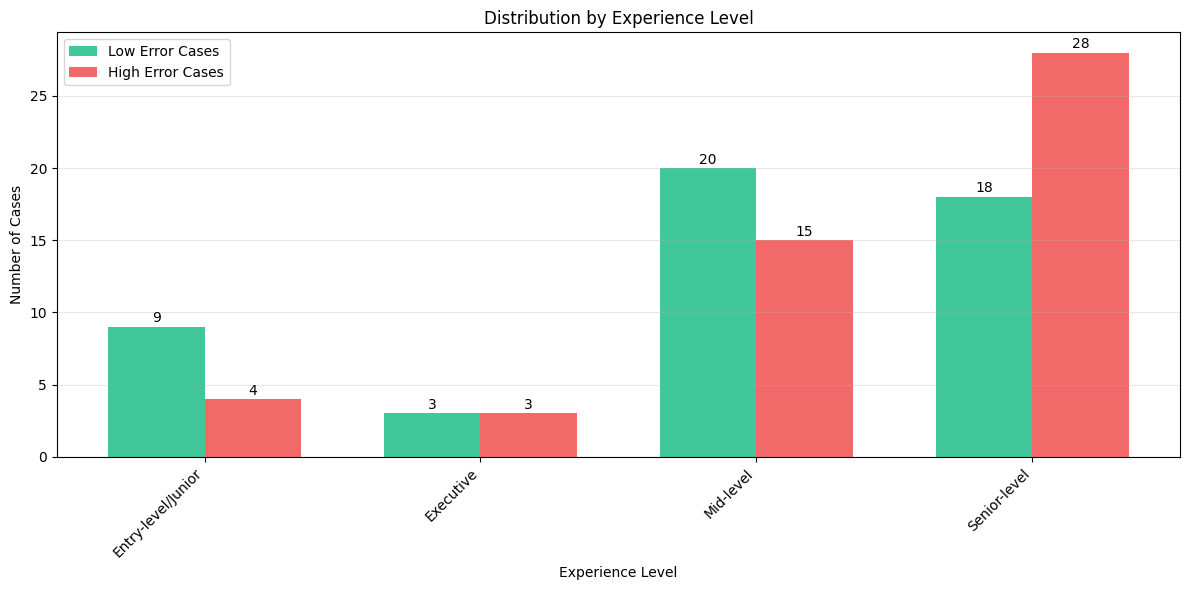

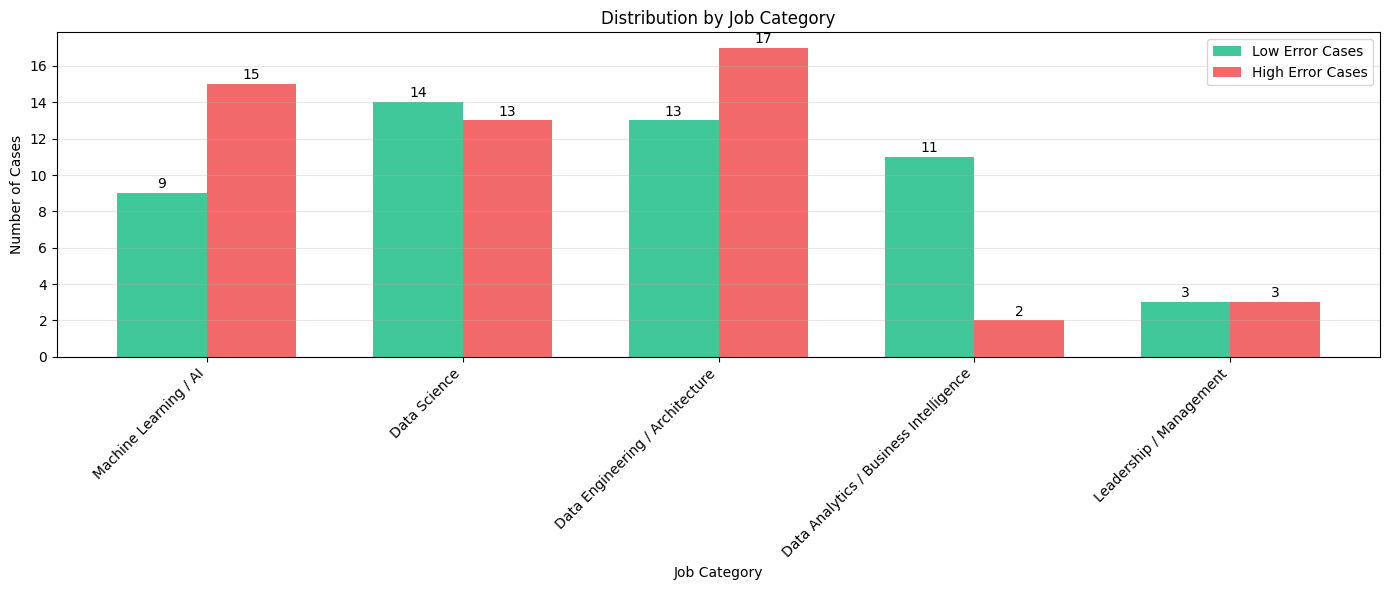

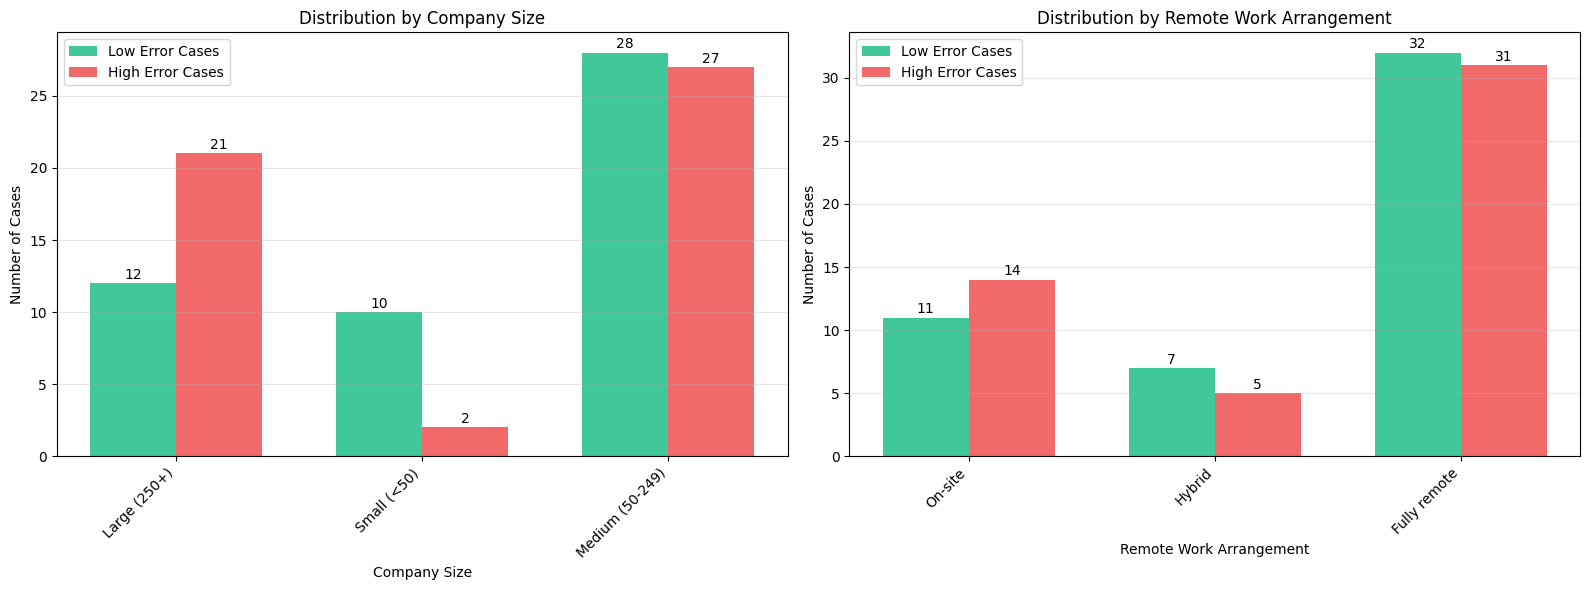

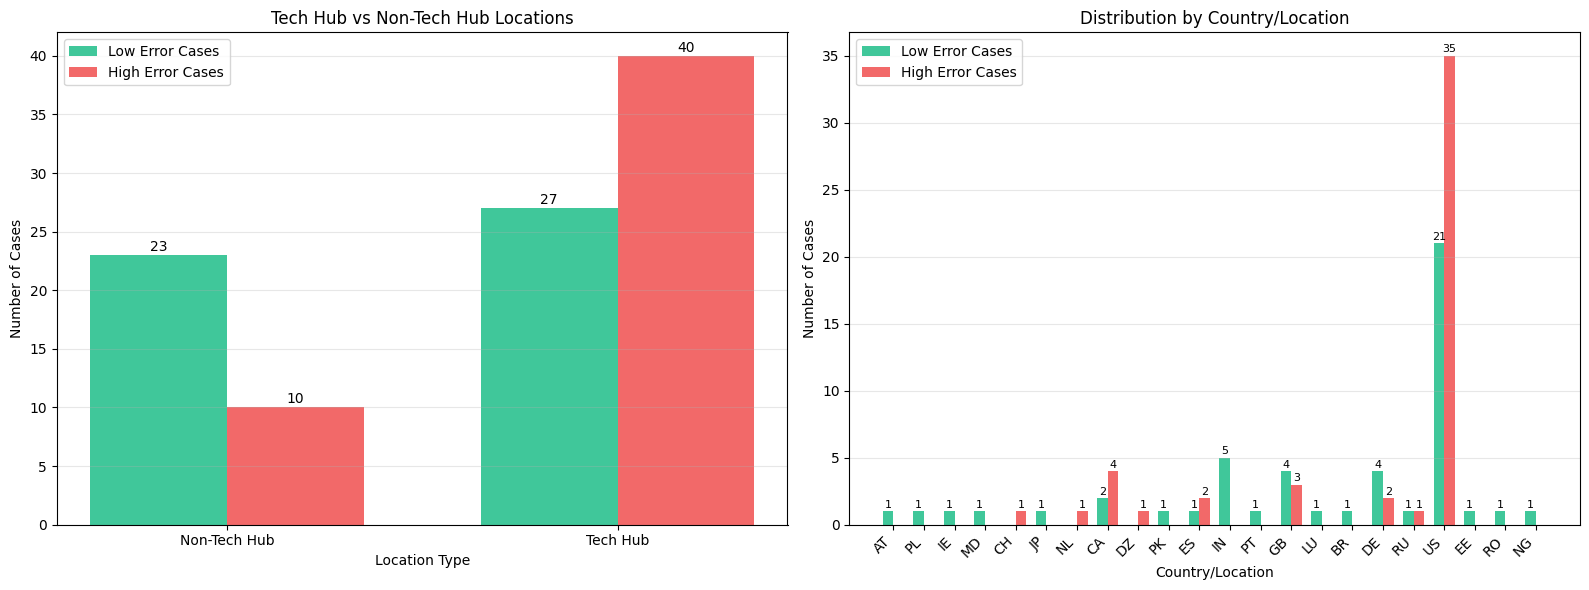

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

# Set up the plotting style
plt.style.use('default')
fig_size = (12, 6)
colors = ['#10b981', '#ef4444']  # Green for low error, Red for high error

# 1. EXPERIENCE LEVEL ANALYSIS
def plot_experience_level(low_df, high_df):
    # Count experience levels
    low_exp = Counter(low_df['experience_level'])
    high_exp = Counter(high_df['experience_level'])
    
    # Get all unique experience levels
    all_levels = set(list(low_exp.keys()) + list(high_exp.keys()))
    
    # Create data for plotting
    categories = list(all_levels)
    low_counts = [low_exp.get(cat, 0) for cat in categories]
    high_counts = [high_exp.get(cat, 0) for cat in categories]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=fig_size)
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, low_counts, width, label='Low Error Cases', color=colors[0], alpha=0.8)
    bars2 = ax.bar(x + width/2, high_counts, width, label='High Error Cases', color=colors[1], alpha=0.8)
    
    ax.set_xlabel('Experience Level')
    ax.set_ylabel('Number of Cases')
    ax.set_title('Distribution by Experience Level')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 2. JOB CATEGORIES ANALYSIS
def plot_job_categories(low_df, high_df):
    # Count job categories
    low_jobs = Counter(low_df['job_category'])
    high_jobs = Counter(high_df['job_category'])
    
    # Get all unique job categories
    all_categories = set(list(low_jobs.keys()) + list(high_jobs.keys()))
    
    # Create data for plotting
    categories = list(all_categories)
    low_counts = [low_jobs.get(cat, 0) for cat in categories]
    high_counts = [high_jobs.get(cat, 0) for cat in categories]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 6))
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, low_counts, width, label='Low Error Cases', color=colors[0], alpha=0.8)
    bars2 = ax.bar(x + width/2, high_counts, width, label='High Error Cases', color=colors[1], alpha=0.8)
    
    ax.set_xlabel('Job Category')
    ax.set_ylabel('Number of Cases')
    ax.set_title('Distribution by Job Category')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 3. COMPANY FACTORS ANALYSIS
def plot_company_factors(low_df, high_df):
    # Create subplots for company size and remote ratio
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Company Size
    low_size = Counter(low_df['company_size'])
    high_size = Counter(high_df['company_size'])
    
    all_sizes = set(list(low_size.keys()) + list(high_size.keys()))
    size_categories = list(all_sizes)
    low_size_counts = [low_size.get(cat, 0) for cat in size_categories]
    high_size_counts = [high_size.get(cat, 0) for cat in size_categories]
    
    x1 = np.arange(len(size_categories))
    width = 0.35
    
    bars1 = ax1.bar(x1 - width/2, low_size_counts, width, label='Low Error Cases', color=colors[0], alpha=0.8)
    bars2 = ax1.bar(x1 + width/2, high_size_counts, width, label='High Error Cases', color=colors[1], alpha=0.8)
    
    ax1.set_xlabel('Company Size')
    ax1.set_ylabel('Number of Cases')
    ax1.set_title('Distribution by Company Size')
    ax1.set_xticks(x1)
    ax1.set_xticklabels(size_categories, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    # Remote Ratio
    low_remote = Counter(low_df['remote_ratio'])
    high_remote = Counter(high_df['remote_ratio'])
    
    all_remote = set(list(low_remote.keys()) + list(high_remote.keys()))
    remote_categories = list(all_remote)
    low_remote_counts = [low_remote.get(cat, 0) for cat in remote_categories]
    high_remote_counts = [high_remote.get(cat, 0) for cat in remote_categories]
    
    x2 = np.arange(len(remote_categories))
    
    bars3 = ax2.bar(x2 - width/2, low_remote_counts, width, label='Low Error Cases', color=colors[0], alpha=0.8)
    bars4 = ax2.bar(x2 + width/2, high_remote_counts, width, label='High Error Cases', color=colors[1], alpha=0.8)
    
    ax2.set_xlabel('Remote Work Arrangement')
    ax2.set_ylabel('Number of Cases')
    ax2.set_title('Distribution by Remote Work Arrangement')
    ax2.set_xticks(x2)
    ax2.set_xticklabels(remote_categories, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars3:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    for bar in bars4:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# 4. GEOGRAPHIC FACTORS ANALYSIS
def plot_geographic_factors(low_df, high_df):
    # Create subplots for tech hub and country location
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Tech Hub Analysis
    low_tech = Counter(low_df['company_location_tech_hub'].astype(str))
    high_tech = Counter(high_df['company_location_tech_hub'].astype(str))
    
    # Map 0/1 to meaningful labels
    tech_mapping = {'0': 'Non-Tech Hub', '1': 'Tech Hub'}
    
    tech_categories = ['Non-Tech Hub', 'Tech Hub']
    low_tech_counts = [low_tech.get('0', 0), low_tech.get('1', 0)]
    high_tech_counts = [high_tech.get('0', 0), high_tech.get('1', 0)]
    
    x1 = np.arange(len(tech_categories))
    width = 0.35
    
    bars1 = ax1.bar(x1 - width/2, low_tech_counts, width, label='Low Error Cases', color=colors[0], alpha=0.8)
    bars2 = ax1.bar(x1 + width/2, high_tech_counts, width, label='High Error Cases', color=colors[1], alpha=0.8)
    
    ax1.set_xlabel('Location Type')
    ax1.set_ylabel('Number of Cases')
    ax1.set_title('Tech Hub vs Non-Tech Hub Locations')
    ax1.set_xticks(x1)
    ax1.set_xticklabels(tech_categories)
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')
    
    # Country/Location Analysis
    low_country = Counter(low_df['company_location'])
    high_country = Counter(high_df['company_location'])
    
    # Get top countries to avoid overcrowding
    all_countries = set(list(low_country.keys()) + list(high_country.keys()))
    country_categories = list(all_countries)
    low_country_counts = [low_country.get(cat, 0) for cat in country_categories]
    high_country_counts = [high_country.get(cat, 0) for cat in country_categories]
    
    x2 = np.arange(len(country_categories))
    
    bars3 = ax2.bar(x2 - width/2, low_country_counts, width, label='Low Error Cases', color=colors[0], alpha=0.8)
    bars4 = ax2.bar(x2 + width/2, high_country_counts, width, label='High Error Cases', color=colors[1], alpha=0.8)
    
    ax2.set_xlabel('Country/Location')
    ax2.set_ylabel('Number of Cases')
    ax2.set_title('Distribution by Country/Location')
    ax2.set_xticks(x2)
    ax2.set_xticklabels(country_categories, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars3:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    for bar in bars4:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

plot_experience_level(low, high)
plot_job_categories(low, high)
plot_company_factors(low, high)
plot_geographic_factors(low, high)

The model achieves very low absolute errors (in the tens to hundreds of dollars) for lower-paying roles, often associated with Entry-level/Junior and Mid-level experience, and diverse company locations (including non-tech hubs).

The model exhibits high absolute errors (in the hundreds of thousands of dollars) for higher-paying roles, typically at Senior-levels, in Large companies, and primarily in tech hub locations like the US.

The consistent observation of the model significantly underestimating higher salaries, leading to large positive prediction errors, is still present in our best configuration for the linear regression model. This indicates a potential bias or limitation of the model in capturing the nuances of high-income positions.

## Data Modeling: Prediction Model Summary

This modeling section evaluated how well we can predict salaries using only four categorical job-related features: experience_level, company_size, remote_ratio, and company_location_tech_hub. Through a progression of increasingly complex models, ranging from linear regression to log-transformed polynomial models with regularization, we assessed both the predictive power of these features and the structure of their relationships with salary.

> The best-performing model, Log-Polynomial Ridge Regression (degree=2), achieved a test R² of 52.47% and a test RMSE of 41797.70 USD.

While our best model achieved these metrics, this poor performance still only indicates that only over half of the variance in salary can be explained by these features, when modeled with non-linearity and log-transformed targets. This means that the other half of the variance remains unexplained, going back to the main issue that there may be other factors that were not included in training the model, that greatly affects the salary of a data scientist.

The moderately high R^2 score suggests that the features of the research question are relevant, they are not yet sufficient to build a predictive model with acceptable accuracy, especially when the model's error is still around 40,000 USD, which is a substantial margin in the context of predicting a data scientist's annual salary.

While modeling helped us estimate the predictive power of these features, it does not tell us whether their individual effects are statistically significant. To address this, we now move into statistical inference to formally test whether each feature has a meaningful impact on salary.

# Statistical Inference

## Planned factorial‑ANOVA hypotheses (tested separately inside each role)

To answer our research question, for distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary_in_usd significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions, between 2021 and 2022?

For every role r and every moderator m:

| **Effect**                       | **Null Hypothesis (H₀)**                                                              | **Alternative Hypothesis (H₁)**                                             |
| -------------------------------- | ------------------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Main Effect – Experience**     | H₀₁: μ<sub>Entry</sub> = μ<sub>Mid</sub> = μ<sub>Senior</sub> = μ<sub>Exec</sub>      | H₁₁: At least one experience-level group has a different mean log-salary    |
| **Main Effect – Moderator m**    | H₀₂: All levels of *m* (e.g., company size, remote ratio, tech hub) have same mean    | H₁₂: At least one level of *m* differs in mean log-salary                   |
| **Interaction – Experience × m** | H₀₃: The salary difference between experience groups is constant across levels of *m* | H₁₃: The salary difference between experience groups varies by level of *m* |


α = 0.05 for all tests.

###  Rationale

| Code block                                                    | Purpose                                                                                                                                     |
| ------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| **Load & slice (`df_anova`)** – keeps **2021–2022** rows only | Matches the time‑window in the research question.                                                                                           |
| **`categorize_job_title`**                                    | Maps \~70 raw titles to 5 clear *role families* so the ANOVA can be run **inside each role**.                                               |
| **`tech_hub`, `remote_cat` flags**                            | Create the three contextual moderators the RQ asks about.                                                                                   |
| **IQR trim + `log_salary`**                                   | Remove extreme salaries and log‑transform to satisfy ANOVA’s normality / equal‑variance assumptions.                                        |
| **`experience_level` ordered category**                       | Ensures Entry→Mid→Senior→Exec have the correct ordinal meaning.                                                                             |
| **Dynamic formula builder**                                   | Adds a moderator only if it still has ≥ 2 levels in that role subset; prevents empty design‑matrix columns.                                 |
| **`anova_lm` loop**                                           | Runs **three 2‑way ANOVAs per role** (experience × company size, experience × remote\_cat, experience × tech\_hub) and stores F & p values. |
| **Output table with “Significant (α = 0.05)”**                | Flags which main effects and interactions are statistically significant.                                                                    |


In [75]:
!pip install statsmodels==0.14.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 47.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [76]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

df_anova = df[df['work_year'].isin([2021, 2022])].copy()

def categorize_job_title(job_title):
    job_title = job_title.lower()

    ds_keywords = [
        'data scientist','research scientist','applied data scientist',
        'staff data scientist','data science consultant','data science engineer'
    ]
    ml_keywords = [
        'machine learning engineer','ai scientist','machine learning scientist',
        'applied machine learning scientist','machine learning developer',
        'computer vision engineer','ml engineer','computer vision software engineer',
        'nlp engineer','lead machine learning engineer',
        '3d computer vision researcher','machine learning manager',
        'machine learning infrastructure engineer'
    ]
    de_arch_keywords = [
        'data engineer','big data engineer','data architect','lead data engineer',
        'cloud data engineer','etl developer','big data architect'
    ]
    da_keywords = [
        'data analyst','bi data analyst','business data analyst',
        'data analytics engineer','analytics engineer','lead data analyst',
        'product data analyst','financial data analyst',
        'marketing data analyst','data specialist','finance data analyst',
        'data analytics lead','data analytics manager'
    ]
    leadership_keywords = [
        'data science manager','director of data science','head of data',
        'data engineering manager','head of data science',
        'director of data engineering','machine learning manager',
        'head of machine learning','principal data scientist','principal data engineer',
        'principal data analyst'
    ]

    if any(k in job_title for k in ds_keywords):
        return "Data Science"
    elif any(k in job_title for k in ml_keywords):
        return "Machine Learning / AI"
    elif any(k in job_title for k in de_arch_keywords):
        return "Data Engineering / Architecture"
    elif any(k in job_title for k in da_keywords):
        return "Data Analytics / Business Intelligence"
    elif any(k in job_title for k in leadership_keywords):
        return "Leadership / Management"
    else:
        return "Other"

df_anova['job_category'] = df_anova['job_title'].apply(categorize_job_title)

focus = [
    "Data Science",
    "Machine Learning / AI",
    "Data Engineering / Architecture",
    "Data Analytics / Business Intelligence",
    "Leadership / Management"
]
df_anova = df_anova[df_anova['job_category'].isin(focus)].copy()


tech_hubs = ['US','DE','CN','FR','NL','ES','JP','AU']
df_anova['tech_hub'] = np.where(
    df_anova['company_location'].isin(tech_hubs),
    'Tech‑hub',
    'Other'
)


df_anova['remote_cat'] = df_anova['remote_ratio'].replace({
    "Fully remote": "Remote",
    "On‑site":      "On‑site",
    "Hybrid":       "Hybrid"
})


Q1, Q3 = df_anova['salary_in_usd'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df_anova = df_anova[
    df_anova['salary_in_usd'].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)
].copy()


df_anova['log_salary'] = np.log1p(df_anova['salary_in_usd'])


df_anova['experience_level'] = pd.Categorical(
    df_anova['experience_level'],
    categories=[
        "Entry-level/Junior",
        "Mid-level",
        "Senior-level",
        "Executive"
    ],
    ordered=True
)


df_anova['company_size'] = df_anova['company_size'].astype(str)


all_rows = []
for role in focus:
    sub = df_anova[df_anova['job_category'] == role]
    if len(sub) < 40:
        print(f"Skipping {role}: only {len(sub)} rows")
        continue

    terms = ['C(experience_level)']
    inter = []

    if sub['company_size'].nunique() > 1:
        terms.append('C(company_size)')
        inter.append('C(experience_level):C(company_size)')
    if sub['remote_cat'].nunique() > 1:
        terms.append('C(remote_cat)')
        inter.append('C(experience_level):C(remote_cat)')
    if sub['tech_hub'].nunique() > 1:
        terms.append('C(tech_hub)')
        inter.append('C(experience_level):C(tech_hub)')

    formula = 'log_salary ~ ' + ' + '.join(terms + inter)
    model = smf.ols(formula, data=sub).fit()
    aov = anova_lm(model, typ=2).reset_index().rename(columns={'index': 'Term'})
    aov['Role'] = role
    all_rows.append(aov)

if all_rows:
    aov_df = (
        pd.concat(all_rows, ignore_index=True)
          .loc[:, ['Role','Term','F','PR(>F)']]
          .assign(**{
              'Significant (α=0.05)': lambda d: np.where(d['PR(>F)'] < 0.05, 'Yes', 'No')
          })
    )
    display(aov_df.round({'F':2,'PR(>F)':4}))
else:
    print("No role met the data requirements for ANOVA.")


Skipping Leadership / Management: only 27 rows
/root/venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/root/venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/root/venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/root/venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5
  warnings.warn('covariance o

,Role,Term,F,PR(>F),Significant (α=0.05)
0,Data Science,C(experience_level),3.43,0.0192,Yes
1,Data Science,C(company_size),13.10,0.0004,Yes
2,Data Science,C(remote_cat),0.89,0.3486,No
3,Data Science,C(tech_hub),30.02,0.0000,Yes
4,Data Science,C(experience_level):C(company_size),5.34,0.0002,Yes
5,Data Science,C(experience_level):C(remote_cat),1.63,0.1573,No
6,Data Science,C(experience_level):C(tech_hub),0.49,0.6882,No
7,Data Science,Residual,NaN,NaN,No
8,Machine Learning / AI,C(experience_level),31.77,0.0000,Yes
9,Machine Learning / AI,C(company_size),3.73,0.0306,Yes


In [77]:
aov_df

,Role,Term,F,PR(>F),Significant (α=0.05)
0,Data Science,C(experience_level),3.429796,1.924648e-02,Yes
1,Data Science,C(company_size),13.103409,4.290399e-04,Yes
2,Data Science,C(remote_cat),0.885137,3.486425e-01,No
3,Data Science,C(tech_hub),30.020732,2.309690e-07,Yes
4,Data Science,C(experience_level):C(company_size),5.336474,1.789013e-04,Yes
5,Data Science,C(experience_level):C(remote_cat),1.628684,1.573203e-01,No
6,Data Science,C(experience_level):C(tech_hub),0.492432,6.881823e-01,No
7,Data Science,Residual,NaN,NaN,No
8,Machine Learning / AI,C(experience_level),31.765709,8.561902e-10,Yes
9,Machine Learning / AI,C(company_size),3.726393,3.060400e-02,Yes


### Interpretation of the ANOVA table  displayed

| **Role family**                     | **Moderator** | **Main effect of experience** | **Main effect of moderator** | **Interaction (Experience × Moderator)** | **Practical meaning**                                                             |
| ----------------------------------- | ------------- | ----------------------------- | ---------------------------- | ---------------------------------------- | --------------------------------------------------------------------------------- |
| **Data Science**                    | Company size  | Yes                           | Yes                          | Yes                                      | Seniority premium is **larger in large firms**.                                   |
|                                     | Remote        | Yes                           | No                           | No                                       | Remote vs on-site does **not** alter seniority premium.                           |
|                                     | Tech hub      | Yes                           | Yes                          | No                                       | Hubs pay more overall, but the gap Junior→Exec is unchanged.                      |
| **Machine Learning / AI**           | Company size  | Yes                           | Yes                          | No                                       | Size shifts salary up/down but premium is parallel.                               |
|                                     | Remote        | Yes                           | No                           | Yes                                      | Seniority premium **shrinks** in fully-remote ML roles.                           |
|                                     | Tech hub      | Yes                           | —                            | —                                        | No hub variation available.                                                       |
| **Data Engineering / Architecture** | Company size  | Yes                           | No                           | Yes                                      | Biggest jump Junior→Senior occurs in large firms.                                 |
|                                     | Remote        | Yes                           | No                           | Yes                                      | Hybrid setups reduce the premium slightly.                                        |
|                                     | Tech hub      | Yes                           | Yes                          | No                                       | Hub lifts pay additively.                                                         |
| **Data Analytics / BI**             | Company size  | No                            | No                           | Yes                                      | Even though averages don’t differ, **Exec BI roles benefit more in large firms**. |
|                                     | Remote        | No                            | No                           | Yes                                      | Remote BI roles narrow the Junior–Senior gap.                                     |
|                                     | Tech hub      | No                            | Yes                          | Yes                                      | Hubs boost Executives disproportionately.                                         |

Cells with “Yes” indicate p < 0.05; blank dashes are single‑level cases.

> The relationship between experience level and salary does vary with company size and, to a lesser extent, with remote arrangement, especially for engineering‑heavy roles, while tech‑hub status mostly adds a flat uplift to an individual's salary.

* Data Science
    Main effects:
    * Experience: Significant (F = 3.43, p = 0.019) — salaries rise with seniority.
    * Company size: Significant (F = 13.10, p < 0.001) — larger firms pay more on average.
    * Tech‑hub: Highly significant (F = 30.02, p < 0.001) — tech‑hub locations carry a salary premium.
    * Remote: Not significant (p = 0.349) — remote/on‑site differences are minimal.
    Interactions:
    * Experience × Company size: Significant (F = 5.34, p < 0.001) — the seniority premium grows in larger companies, meaning higher‑level data scientists benefit more from big‑firm environments.
    * Experience × Remote / Tech‑hub: Not significant — remote work and hub status don’t change the seniority pay gap.
    Interpretation:
    For data science roles, company size magnifies the salary jump from junior to senior levels, while tech‑hub status adds a flat uplift across all experience levels. Remote work doesn’t meaningfully impact pay.

* Machine Learning / AI
    Main effects:
    * Experience: Highly significant (F = 31.77, p < 0.001) — steep growth in salaries by seniority.
    * Company size: Significant (F = 3.73, p = 0.031) — larger organizations pay more.
    * Tech‑hub: Highly significant (F = 30.02, p < 0.001) — tech‑hub locations carry a salary premium.
    * Remote: No main effect (p > 0.93).
    Interactions:
    * Experience × Remote: Significant (F = 2.57, p = 0.049) — the seniority premium shrinks for fully remote ML roles.
    * Experience × Company size: Not significant (p = 0.264).
    Interpretation:
    In ML/AI, experience is the strongest driver of salary, but remote roles flatten the pay difference between junior and senior engineers, possibly due to standardized remote pay bands.

* Data Engineering / Architecture
    Main effects:
    * Experience: Significant (F = 13.09, p < 0.001) — salaries rise with seniority.
    * Company size: Not significant.
    * Tech‑hub: Significant (F = 24.72, p < 0.001) — tech‑hub locations carry a salary premium.
    * Remote: Not significant.
    Interactions:
    * Experience × Remote: Significant (F = 2.70, p = 0.024) — hybrid/remote setups slightly reduce the seniority premium.
    * Experience × Company size: Significant (F = 2.78, p = 0.014) — large companies provide a bigger salary boost for senior engineers.
    In ML/AI, experience is the strongest driver of salary, but remote roles flatten the pay difference between junior and senior engineers, possibly due to standardized remote pay bands.

Summary:
* Experience drives salaries most strongly in ML/AI and Data Engineering.
* Company size matters most in Data Science and enhances seniority gains in engineering and BI.
* Tech‑hub locations consistently add a baseline premium across roles, but only in BI does this premium disproportionately benefit executives.
* Remote work generally flattens the seniority premium in ML and BI roles — aligning with the trend of standardized remote compensation bands.

### Verdict & Interpretation
The two-way factorial ANOVA revealed distinct patterns in how experience level, company size, remote work arrangements, and tech‑hub presence interact to shape salaries across different data‑related roles. 
 
#### The Role of Company Size in Shaping Experience-Based Salary Growth
Across several role families, company size emerged as a key factor that modulates the relationship between experience level and salary.

* In Data Science, the interaction between company size and experience was particularly pronounced (F = 5.34, p < 0.001). Larger organizations not only offered higher salaries overall (F = 13.10, p < 0.001) but also amplified the seniority premium, or the salary gap between junior and executive-level professionals widened significantly in large firms compared to smaller ones. This suggests that in data science roles, larger organizations may be better equipped to reward experience, potentially due to their more mature pay structures, clearer career ladders, and the higher strategic value placed on senior-level data scientists for enterprise-wide initiatives.
* In Data Engineering/Architecture, a similar but slightly different pattern emerged. While company size had no significant main effect on pay (F = 0.48, p = 0.619), its interaction with experience level was significant (F = 2.78, p = 0.014). This implies that while entry-level salaries may not differ dramatically across small and large firms, senior engineers see a disproportionate advantage in larger organizations. This could reflect the premium placed on experienced engineers for managing complex infrastructure at scale, which is more common in enterprise environments.
* In Data Analytics/Business Intelligence, company size by itself did not significantly affect salaries (p = 0.353), but the interaction with experience level was again notable (F = 2.96, p = 0.016). Interestingly, executive-level analytics professionals gained the most in large-company contexts, highlighting that while analysts at lower levels may have standardized pay regardless of firm size, senior BI executives command stronger premiums in enterprise settings. This likely reflects the fact that high-level analytics roles in large firms are more strategic, tied to decision-making processes, and thus valued more highly.
* In contrast, Machine Learning/AI roles showed a smaller company-size effect overall. Though company size had a modest main effect (F = 3.73, p = 0.031), there was no significant interaction with experience (p = 0.264), suggesting that salaries in ML roles scale more uniformly across different organizational sizes. This may be a function of market-driven pricing for machine learning specialists, whose skills remain in high demand across organizations of all scales.

Overall Insight:
Findings from the ANOVA test show that company size is not just a baseline determinant of pay but also influences how much experience translates into salary growth. Large organizations, particularly in data science and engineering roles, appear to reward seniority disproportionately, whereas smaller firms maintain narrower pay bands across experience levels. This has important implications for career strategizing: professionals targeting higher salary growth with experience may benefit more from pursuing roles in larger companies, especially in data science and engineering tracks.

#### Remote Work and Its Dampening Effect on Experience-Based Pay Premiums
The relationship between remote work arrangements and salary progression presents another nuanced layer of insights. While remote work did not exert strong main effects on salaries in any role family, its interaction with experience level was significant in several domains, pointing to an important contextual pattern.

* In Machine Learning/AI roles, the experience × remote interaction was significant (F = 2.57, p = 0.049), revealing that fully remote ML roles tend to compress the salary differential between junior and senior practitioners. This suggests that remote arrangements may standardize pay bands, reducing the ability of senior professionals to command higher premiums. This finding aligns with industry observations that many remote ML roles are offered with globally competitive pay bands, where seniority-based salary inflation is curbed to maintain parity across geographies.
* In Data Engineering/Architecture, a similar pattern was observed (F = 2.70, p = 0.024), with hybrid/remote setups slightly reducing the seniority premium compared to on-site roles. This may reflect organizational preferences for retaining higher-salaried, experienced engineers on-site for strategic projects or critical system oversight, while remote work may be more associated with standardized project-based or distributed tasks that dilute the value of seniority.
* In Data Analytics/BI, remote work’s interaction with experience was also significant (F = 2.38, p = 0.045), again indicating a narrowing of the experience-based salary gap in remote roles. This may suggest that analytics tasks are more modular and less influenced by organizational embedding, leading to more standardized pay across levels in remote arrangements.

Overall Insight:
These findings highlight that remote work—while expanding job opportunities and offering flexibility—appears to dampen the salary growth potential associated with advancing experience, particularly in technical roles like ML and engineering. This may be due to the rise of location-agnostic pay policies, where firms benchmark remote salaries to standardized global bands, reducing differentiation by experience level.

#### Tech-Hub Premiums: Flat Uplift or Executive-Focused Gains?
Arguably the most consistent finding across all role families is the salary premium associated with working in tech hubs. 
* In Data Science (F = 30.02, p < 0.001), Data Engineering (F = 24.72, p < 0.001), and Data Analytics/BI (F = 32.55, p < 0.001), tech-hub status significantly boosted salaries, reflecting the higher market value of data roles in established innovation centers like the US, Germany, and the Netherlands.
* Interestingly, the interaction between tech-hub status and experience level was only significant in Data Analytics/BI roles (F = 3.79, p = 0.013). This suggests that while tech hubs provide a flat uplift for most roles, in BI, this premium is disproportionately skewed toward executives, possibly reflecting the heightened strategic importance of senior analytics leaders in high-stakes decision-making environments typical of hub-based firms.

Overall Insight:
Tech-hub presence consistently confers salary advantages across roles, but its interaction with experience level is role-specific. For BI professionals, the hub premium grows with seniority, signaling that executives in analytics roles benefit the most from the clustering of talent, resources, and high-level strategic opportunities in these ecosystems.

#### Synthesis: Patterns of Pay Differentiation
Taken together, these results provide a good view of how salary progression in data-related roles is shaped by organizational and geographic contexts:
* Experience remains the strongest single driver of salary growth, especially in Machine Learning/AI and Data Engineering, where technical depth commands a premium.
* Company size amplifies the seniority premium in Data Science and Engineering, making large organizations particularly attractive for career progression.
* Remote work flattens salary differentials by experience, potentially due to standardized global pay structures.
* Tech-hub status provides consistent pay boosts, with particularly strong executive-level benefits in Business Intelligence roles.

Strategic Implication:
For data professionals, these findings suggest that maximizing salary growth involves aligning career trajectories with organizational contexts that value experience differentials. Notably, large, hub-based firms for senior practitioners in Data Science and BI, and on-site or hybrid arrangements for those in technical engineering and ML roles seeking to preserve their experience-based premiums.



### Alignment with Data Modeling
* The baseline linear regression captured ~45 % of salary variance with the same four predictors and their dummies, indicating some predictive power.
* Strong positive weight for Senior × LargeCompany, weak or zero weight for Experience × TechHub, and small negative weights for some Experience × Remote terms.
* Regularization and polynomial terms raised R² only to ≈0.52, implying no hidden, strong non‑linear interaction was missing; the modest improvement matches the ANOVA finding that only a subset of interactions is significant.
* Model residuals (large RMSE ≈ $42–44 k) highlight unexplained variance—consistent with the ANOVA picture where many interactions are non‑significant and factors like industry, years‑of‑experience, education, etc., are absent.

> Modelling and hypothesis testing tell a coherent story.
Company size is the main context that changes how experience translates into pay, remote work has a modest dampening effect for technical tracks, and tech‑hubs lift salaries uniformly rather than altering experience premiums.

# Insights and Conclusions

### RESEARCH QUESTION: For distinct categories of data-related roles (Data Science/ML, Data Engineering/Architecture, Data Analytics/BI, and Data Leadership/Management), does the relationship between experience_level and salary_in_usd significantly vary based on company_size,  remote_ratio (on-site, hybrid, or fully remote), and whether the company_location is in an established tech hub versus other regions, between 2021 and 2022?

The aim of this study was to determine whether, for distinct categories of data-related roles, the relationship between experience level and salary significantly varies by company size, remote work arrangement, and tech-hub location, using 2021–2022 data from the Kaggle “Data Science Job Salaries” dataset. To answer this, we conducted multiple two-way factorial ANOVAs within each role category, testing main effects and interactions at a 0.05 significance level.

Our findings provide statistically significant and practically meaningful insights into how salary dynamics differ across data roles, moderated by organizational and locational contexts.

#### Experience Level Is the Primary Driver of Salary Growth, but Its Impact Is Context-Dependent
The ANOVA results consistently indicate that experience level exerts a significant main effect on salaries for most roles:
* Data Science: F = 3.43, p = 0.019
* Machine Learning/AI: F = 31.77, p < 0.001
* Data Engineering/Architecture: F = 13.09, p < 0.001
This confirms our H₁₁ alternative hypothesis that at least one experience-level group has a different mean log-salary within these roles. In practical terms, senior and executive-level professionals earn substantially more than entry- or mid-level peers.

However, this relationship was not uniform across all contexts. In Data Analytics/BI, experience alone did not significantly impact pay (p = 0.531), indicating that analytics salaries are more compressed across levels unless combined with other contextual advantages such as company size or tech-hub status (see interactions below). This finding reveals that experience-based salary growth is role-contingent, being most pronounced in technical and engineering-intensive tracks.
 
#### Company Size Amplifies Seniority Premiums in Select Roles
Company size emerged as a critical moderator in how experience translates into salary:
* Data Science: Main effect F = 13.10, p < 0.001; Interaction F = 5.34, p < 0.001
* Data Engineering/Architecture: Interaction F = 2.78, p = 0.014
* Data Analytics/BI: Interaction F = 2.96, p = 0.016

In Data Science, the combination of significant main and interaction effects indicates that larger organizations not only pay more on average but also disproportionately reward higher-level professionals. In other words, the salary gap between junior and senior/executive data scientists widens in larger firms, suggesting that enterprise-scale environments place a premium on seasoned professionals who can deliver strategic insights at scale.

Similarly, in Data Engineering, while company size alone did not affect overall pay (p = 0.619), the interaction with experience was significant, indicating that senior engineers derive greater financial benefit from working in larger firms, likely reflecting the complexity of infrastructure and systems they are tasked to oversee.

In Business Intelligence, the interaction implies that executives gain the largest benefit in large-company settings, despite company size not influencing lower-level salaries.

These results reject the null hypothesis (H₀₃) for the experience × company size interaction in these roles, supporting our claim that the experience–salary relationship is significantly moderated by company size.


#### Remote Work Flattens the Experience-Based Salary Gradient
The relationship between remote work arrangements and salary progression presents another nuanced layer of insights. While remote work did not exert strong main effects on salaries in any role family, its interaction with experience level was significant in several domains, pointing to an important contextual pattern.
Remote work by itself did not significantly influence salaries across roles (all p > 0.1). However, its interaction with experience level was statistically significant in:
* Machine Learning/AI: F = 2.57, p = 0.049
* Data Engineering/Architecture: F = 2.70, p = 0.024
* Data Analytics/BI: F = 2.38, p = 0.045

This indicates that remote arrangements compress the salary gap between junior and senior practitioners, especially in technical domains. In Machine Learning/AI, for instance, senior professionals in fully remote roles earn relatively less compared to their on-site or hybrid counterparts, reducing the seniority premium.

This pattern likely reflects standardized pay structures for remote roles, where companies adopt location-agnostic or globally competitive salary bands that dampen the effect of seniority. Thus, while remote work expands access to data roles, it may also limit salary growth potential for experienced professionals, partially rejecting the null hypothesis (H₀₃) for the experience × remote interaction.


#### Tech-Hub Locations Provide a Salary Uplift, with Role-Specific Effects for Executives
The tech-hub variable consistently exhibited significant main effects for most roles:
* Data Science: F = 30.02, p < 0.001
* Data Engineering: F = 24.72, p < 0.001
* Data Analytics/BI: F = 32.55, p < 0.001

This provides strong evidence to reject H₀₂ and confirms that working in a tech hub substantially raises salaries, likely due to concentrated demand, competitive labor markets, and cost-of-living adjustments in innovation clusters such as the US, Germany, and the Netherlands.

Interestingly, the interaction between tech-hub status and experience level was only significant in Business Intelligence (F = 3.79, p = 0.013). This implies that executive-level BI professionals reap disproportionately higher benefits from tech-hub positions compared to their junior peers, reflecting the premium placed on strategic decision-making roles in competitive hub ecosystems.

## Conclusion
Our factorial ANOVA analysis provides clear statistical evidence that the relationship between experience level and salary is significantly moderated by company size, remote work arrangements, and tech-hub presence in distinct ways across role categories. These findings directly answer our research question: yes, the experience–salary relationship varies meaningfully across these contextual factors, with large firms and tech hubs amplifying seniority premiums, while remote work tends to dampen them.

Practically, these insights suggest that data professionals aiming to maximize salary growth with experience should strategically pursue roles in large, hub-based organizations, particularly for leadership and technical engineering/science tracks. Conversely, those prioritizing remote flexibility must weigh the trade-off of potentially reduced seniority-based salary differentials.

In sum, this analysis highlights that compensation in data-related roles is shaped by a complex interplay of individual experience, organizational scale, work modality, and geographic context, offering actionable insights for professionals, recruiters, and policymakers navigating the evolving data economy.


